### PROBLEM
*Emlakjet,* satılık/kiralık veya yatırımlık olsun aranan emlağı en hızlı ve en kolay şekilde bulma fırsatı sunmak üzere 2006 yılında kurulan bir platformdur. Projenin amacı, Türkiyedeki satılık konutların analizini çıkartmak ve fiyat tahminini yapmaktır.

### VERİSETİNİN HİKAYESİ
19-23 Eylül 2023 tarihleri arasındaki emlakjet sitesindeki bütün illerin satılık konut bilgilerini içeren bir verisetidir. Yaklaşık *155.000 veri* ve *20 adet parametre* içermektedir

**Fiyat :** Konutun fiyat bilgisi<br>
**Adres :** Konum bilgisi (İl/İlçe/Mahalle)<br>
**Oda Sayısı :** Konut oda bilgisi (3+1, Stüdyo...)<br>
**Bulunduğu Kat :** Kat sayısı (5.Kat, Çatı Katı, Bahçe Katı, Yüksek Giriş...)<br>
**Isıtma Tipi :** Sobalı / Doğalgaz ...<br>
**Krediye Uygunluk :** Krediye Uygun/Krediye Uygun Değil<br>
**Yapı Durumu :** Sıfır / Yapım Aşamasında / İkinci El<br>
**Tapu Durumu :** Kat Mülkiyeti / Kat İrtifakı ...<br>
**Eşya Durumu :** Eşyalı / Eşyasız  <br>
**Site İçerisinde :** Evet / Hayır<br>
**Türü :** Verisetinde tür sadece *"Konut"* bilgisini içermektedir<br>
**Tipi :** Konutun tipi (Bina, Daire, Residence...)<br>
**Brüt Metrekare :** Konutun brüt metrekare değeri<br>
**Binanın Yaşı :** Bina kaç yıldır var<br>
**Binanın Kat Sayısı :** Konut kaç katlı binada<br>
**Kullanım Durumu :** Boş / Kiracı Oturuyor / Mülk sahibi Oturuyor<br>
**Yatırıma Uygunluk :** Uygun / Uygun Değil<br>
**Banyo Sayısı :** Konutta kaç banyo var<br>
**Balkon Sayısı :** Konutta kaç balkon var <br>
**WC Sayısı :** Konutta kaç wc var<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# display settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)
#pd.set_option('display.width', 500)

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
def check_df(dataframe, head=5):
    print("INFO".center(70,'='))
    print(dataframe.info())

    print("TYPES".center(70,'='))
    print(dataframe.dtypes)

    print("NULL".center(70,'='))
    print(dataframe.isnull().sum())

In [6]:
check_df(df)

=================================INFO=================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154802 entries, 0 to 154801
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Fiyat               154802 non-null  object
 1   Adres               154802 non-null  object
 2   Oda Sayısı          154802 non-null  object
 3   Bulunduğu Kat       154802 non-null  object
 4   Isıtma Tipi         154802 non-null  object
 5   Krediye Uygunluk    154802 non-null  object
 6   Yapı Durumu         154802 non-null  object
 7   Tapu Durumu         154802 non-null  object
 8   Eşya Durumu         154802 non-null  object
 9   Site İçerisinde     154802 non-null  object
 10  Türü                154802 non-null  object
 11  Tipi                154802 non-null  object
 12  Brüt Metrekare      154802 non-null  object
 13  Binanın Yaşı        154802 non-null  object
 14  Binanın Kat Sayısı  154802 no

In [7]:
df.head()

,Fiyat,Adres,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Türü,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı
0,"2,250,000TL",Adana - Aladağ - Ceritler Mahallesi,3+1,Belirtilmemiş,Isıtma Yok,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Boş,Hayır,Konut,Müstakil Ev,135 M2,0 (Yeni),2,Boş,Belirtilmemiş,2,1,Belirtilmemiş
1,"2,500,000TL",Adana - Aladağ - Ceritler Mahallesi,4+2,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,300 M2,16-20,2,Boş,Belirtilmemiş,2,Belirtilmemiş,Belirtilmemiş
2,"900,000TL",Adana - Aladağ - Ceritler Mahallesi,1 Oda,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,725 M2,21 Ve Üzeri,1,Boş,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş
3,"1,240,000TL",Adana - Ceyhan - Namık Kemal Mahallesi,2+1,5.Kat,Isıtma Yok,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Konut,Daire,87 M2,21 Ve Üzeri,5,Kiracı Oturuyor,Bilinmiyor,1,Belirtilmemiş,Belirtilmemiş
4,"4,800,000TL",Adana - Ceyhan - Şahin Özbilen Mahallesi,2+1,Yüksek Giriş,Klimalı,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Daire,120 M2,15-Nov,1,Kiracı Oturuyor,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş


In [8]:
def data_prep(dataframe):
    
    # Adres sütunu il-ilce-mahalle olarak 3 kısma bölündü ve yeni sütun olarak eklendi
    dataframe["Sehir"], dataframe["Ilce"], dataframe["Mahalle"] = dataframe["Adres"].str.split(" - ", 2).str
    dataframe = dataframe.drop("Adres",axis=1)
    
    # Tipi bina olup oda sayısı 3+1, 2+1 gibi olanlar vardı. O yüzden kaldırıldı
    dataframe.drop(dataframe[dataframe["Tipi"] == "Bina"].index, axis=0, inplace=True)
    
    # Hepsi konut olduğu için bu sütunu kaldırıldı
    dataframe = dataframe.drop("Türü",axis=1) 
    
    # Fiyat değişkeni object tipinden integer tipine çevrildi
    dataframe["Fiyat"] = dataframe["Fiyat"].str.replace(",","")
    dataframe["Fiyat"] = dataframe["Fiyat"].str.split("T").str[0]
    dataframe["Fiyat"] = dataframe["Fiyat"].astype(np.int64)
    
    # Oda sayısı evdeki toplam oda sayısı şeklinde düzeltildi
    def oda_sayisi(oda):
        if oda == "9+ Oda":
            return 9
        elif oda == "Stüdyo" or oda == "1 Oda":
            return 1
        else:
            sayi1, sayi2 = oda.split("+", 1)
            return int(float(sayi1)) + int(sayi2)

    dataframe["Oda Sayısı"] = dataframe["Oda Sayısı"].apply(oda_sayisi)
    
    # Binanın yaşı 5-10 ve 11-15 olan değerler "10-May" ve "15-Nov" şeklinde alındığı için düzeltildi
    dataframe["Binanın Yaşı"] = dataframe["Binanın Yaşı"].str.replace("10-May","5-10")
    dataframe["Binanın Yaşı"] = dataframe["Binanın Yaşı"].str.replace("15-Nov","11-15")
    
    
    # Kat bilgileri düzeltildi
    def kat_sayisi(kat):
        if kat == "Belirtilmemiş":
            return np.nan
        elif kat == "Bodrum Kat":
            return "-1"
        elif (kat == "Bahçe Katı") or (kat == "Bahçe Dublex") | (kat == "Yüksek Giriş"):
            return "1"
        elif kat == "Düz Giriş (Zemin)":
            return "0"
        elif 'Kot' in kat:
            return "-"+(kat.split(' ')[-2])  
        elif "+" in kat:
            return kat.replace("+.Kat","")
        else:
            return kat.split('.')[0] 
        
    dataframe["Bulunduğu Kat"] = dataframe["Bulunduğu Kat"].apply(kat_sayisi)
    
    # Bulunduğu kat değişkeninde "Villa Tipi" ve "Müstakil" olup, binanın kat sayısı 4ten büyük olan evler kaldırıldı
    bina_tipi = ["Villa Tipi","Müstakil"]
    dataframe.drop(dataframe[(dataframe["Bulunduğu Kat"].isin(bina_tipi)) & (dataframe["Binanın Kat Sayısı"]>4)].index, axis=0, inplace=True)
    
    # Bulunduğu kat değişkeninde ["Villa Tipi","Müstakil","Çatı Katı","Çatı Dubleks"] yazan değerleri
    # binanın kat sayısı ile değiştirildi
    bina_tipi = ["Villa Tipi","Müstakil","Çatı Katı","Çatı Dubleks"]
    dataframe.loc[dataframe["Bulunduğu Kat"].isin(bina_tipi), "Bulunduğu Kat"] = dataframe.loc[dataframe["Bulunduğu Kat"].isin(bina_tipi), "Binanın Kat Sayısı"]
    
    # Sıkıntılı ilanlardı. Net m2 = 1 ?
    dataframe.drop(dataframe[dataframe["Bulunduğu Kat"]==44].index, axis=0, inplace=True)
    
    # Boş olan değerler Null olarak atandı
    dataframe = dataframe.replace(["Belirtilmemiş","Bilinmiyor"], np.nan) 

    # WC Sayısında diğer değerler normal sayı iken sadece 6+ değeri farklıydı ve düzeltildi
    # Balkon ve WC Sayıları int tipine çevrildi
    
    dataframe["WC Sayısı"] = dataframe["WC Sayısı"].replace("6+","6")
    dataframe["WC Sayısı"] = pd.to_numeric(dataframe["WC Sayısı"], errors='coerce').astype('Int64') 
    
    dataframe["Balkon Sayısı"] = pd.to_numeric(dataframe["Balkon Sayısı"], errors='coerce').astype('Int64')     
    dataframe["Bulunduğu Kat"] = pd.to_numeric(dataframe["Bulunduğu Kat"], errors='coerce').astype('Int64')     
    
    def brut(value):
        return int(value.replace(".", "").split(" ")[0])
    
    dataframe["Brüt Metrekare"] = dataframe["Brüt Metrekare"].apply(brut)

    return dataframe

In [9]:
df = data_prep(df)

In [10]:
df.head()

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
0,2250000,4,<NA>,Isıtma Yok,Krediye Uygun,NaN,NaN,Boş,Hayır,Müstakil Ev,135,0 (Yeni),2,Boş,NaN,2,1,<NA>,Adana,Aladağ,Ceritler Mahallesi
1,2500000,6,<NA>,Sobalı,NaN,NaN,NaN,NaN,Hayır,Müstakil Ev,300,16-20,2,Boş,NaN,2,<NA>,<NA>,Adana,Aladağ,Ceritler Mahallesi
2,900000,1,<NA>,Sobalı,NaN,NaN,NaN,NaN,Hayır,Müstakil Ev,725,21 Ve Üzeri,1,Boş,NaN,1,<NA>,<NA>,Adana,Aladağ,Ceritler Mahallesi
3,1240000,3,5,Isıtma Yok,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Daire,87,21 Ve Üzeri,5,Kiracı Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Namık Kemal Mahallesi
4,4800000,3,1,Klimalı,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,120,11-15,1,Kiracı Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Şahin Özbilen Mahallesi


In [11]:
df.isnull().sum()

Fiyat                      0
Oda Sayısı                 0
Bulunduğu Kat          20108
Isıtma Tipi                0
Krediye Uygunluk        7863
Yapı Durumu            91997
Tapu Durumu            94967
Eşya Durumu            52158
Site İçerisinde            0
Tipi                       0
Brüt Metrekare             0
Binanın Yaşı               0
Binanın Kat Sayısı         0
Kullanım Durumu            0
Yatırıma Uygunluk      99222
Banyo Sayısı               0
Balkon Sayısı         111354
WC Sayısı             101407
Sehir                      0
Ilce                       0
Mahalle                    0
dtype: int64

In [12]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,153815.000,4408245.773,13376393.645,8500.000,1100000.000,1800000.000,2650000.000,4250000.000,8000000.000,29500000.000,2400000000.000
Oda Sayısı,153815.000,3.790,1.168,1.000,2.000,3.000,4.000,4.000,5.000,8.000,12.000
Bulunduğu Kat,133707.000,3.086,3.021,-4.000,0.000,1.000,2.000,4.000,6.000,14.000,40.000
Brüt Metrekare,153815.000,369.253,43613.134,2.000,65.000,100.000,130.000,170.000,240.000,700.000,16644664.000
Binanın Kat Sayısı,153815.000,5.414,4.229,1.000,2.000,3.000,4.000,6.000,10.000,24.000,99.000
Banyo Sayısı,153815.000,1.531,0.739,1.000,1.000,1.000,1.000,2.000,2.000,4.000,5.000
Balkon Sayısı,42461.000,1.614,0.648,1.000,1.000,1.000,2.000,2.000,2.000,3.000,3.000
WC Sayısı,52408.000,1.681,0.757,1.000,1.000,1.000,2.000,2.000,3.000,4.000,6.000


1- Veri kümesinde kaç ev bulunmaktadır?

In [13]:
df.shape

(153815, 21)

2- Her ilden kaç ev bulunmaktadır?

In [14]:
df["Sehir"].value_counts()

İstanbul          31127
İzmir             15224
Ankara            11852
Balıkesir          9577
Antalya            8509
Tekirdağ           5720
Muğla              5530
Aydın              5499
Mersin             5477
Bursa              5085
Manisa             3365
Adana              3149
Samsun             3148
Gaziantep          3072
Konya              3015
Kocaeli            2904
Sakarya            2865
Kayseri            2654
Şanlıurfa          2609
Eskişehir          2430
Denizli            2348
Diyarbakır         1982
Trabzon            1362
Yalova             1195
Çanakkale           992
Ordu                752
Sivas               697
Kırklareli          670
Van                 598
Edirne              573
Afyonkarahisar      563
Kahramanmaraş       560
Düzce               500
Malatya             471
Çorum               463
Elazığ              455
Kütahya             442
Hatay               433
Giresun             432
Mardin              410
Kilis               367
Batman          

3- Hangi illerde 10binden fazla ev vardır?

In [15]:
onbin_ev = df["Sehir"].value_counts()
onbin_ev[onbin_ev >= 10000]

İstanbul    31127
İzmir       15224
Ankara      11852
Name: Sehir, dtype: int64

4- En fazla ev bulunan ilin en yüksek ve en düşük fiyatları nedir?

In [16]:
sehir = df["Sehir"].value_counts().index[0]
print(df[df["Sehir"] == sehir]["Fiyat"].max())
print(df[df["Sehir"] == sehir]["Fiyat"].min())

714000000
30000


5- Evlerin ortalama fiyatı nedir?

In [17]:
df["Fiyat"].mean()

4408245.772577447

6- Her ildeki evlerin ortalama fiyatı nedir?

In [18]:
df.groupby("Sehir")["Fiyat"].mean().sort_values(ascending=False)
# İllerdeki ev sayısı göz önünde bulundurulmalı !!

Sehir
Muğla            9150447.971
İstanbul         6410270.030
Antalya          5825159.481
İzmir            5121868.600
Afyonkarahisar   5044135.876
Edirne           4914673.646
Balıkesir        4737876.402
Bartın           4644556.189
Aydın            4359471.538
Hatay            4245564.665
Mersin           4194850.778
Çanakkale        4093980.846
Zonguldak        4017910.507
Nevşehir         4017663.265
Kocaeli          3683348.020
Trabzon          3580090.389
Yalova           3370995.013
Sinop            3308111.111
Adana            3154538.262
Konya            3116392.784
Bursa            3115806.840
Ankara           3063393.530
Sakarya          3048646.531
Kahramanmaraş    2950445.702
Rize             2895968.354
Tekirdağ         2854307.330
Ağrı             2750000.000
Gaziantep        2666982.676
Kayseri          2658242.328
Van              2652531.773
Denizli          2586888.246
Kırklareli       2585508.060
Aksaray          2578597.321
Diyarbakır       2575747.053
Burdur  

7- Yeni yapılan evlerin ortalama fiyatı nedir?

In [19]:
df["Binanın Yaşı"].unique()

array(['0 (Yeni)', '16-20', '21 Ve Üzeri', '11-15', '5-10', '4', '2', '1',
       '3'], dtype=object)

In [20]:
df[df["Binanın Yaşı"] == "0 (Yeni)"]["Fiyat"].mean()

4782758.684563759

8- İstanbuldaki ev sayısının yüzdesi kaçtır?

In [21]:
df[df["Sehir"] == "İstanbul"].shape[0] / df.shape[0] * 100

20.236647921204042

9- Tip değişkenine göre grafik çıkartın.

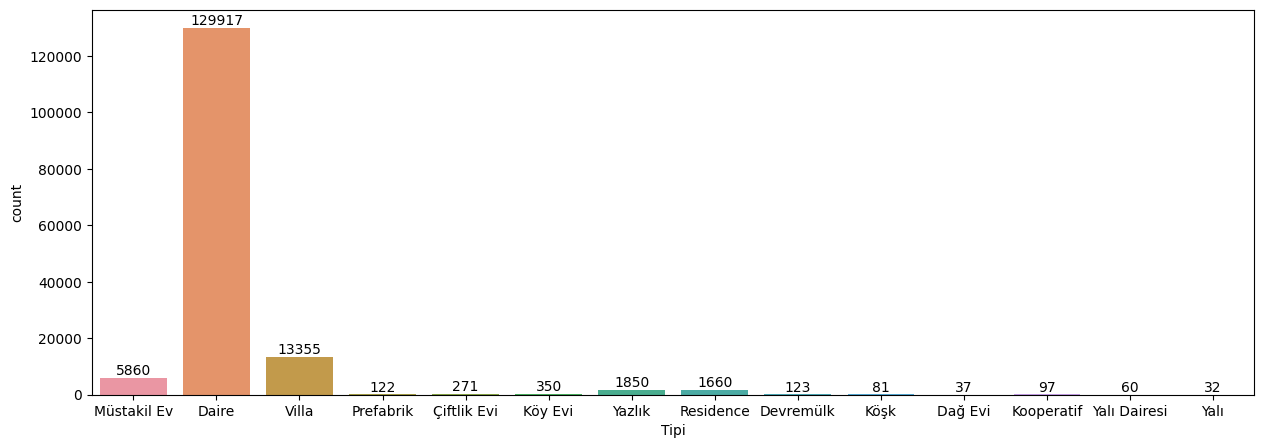

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Tipi',data=df)
ax.bar_label(ax.containers[0])
plt.show()

10- İstanbul ilçe bazında grafiğı çıkartın.

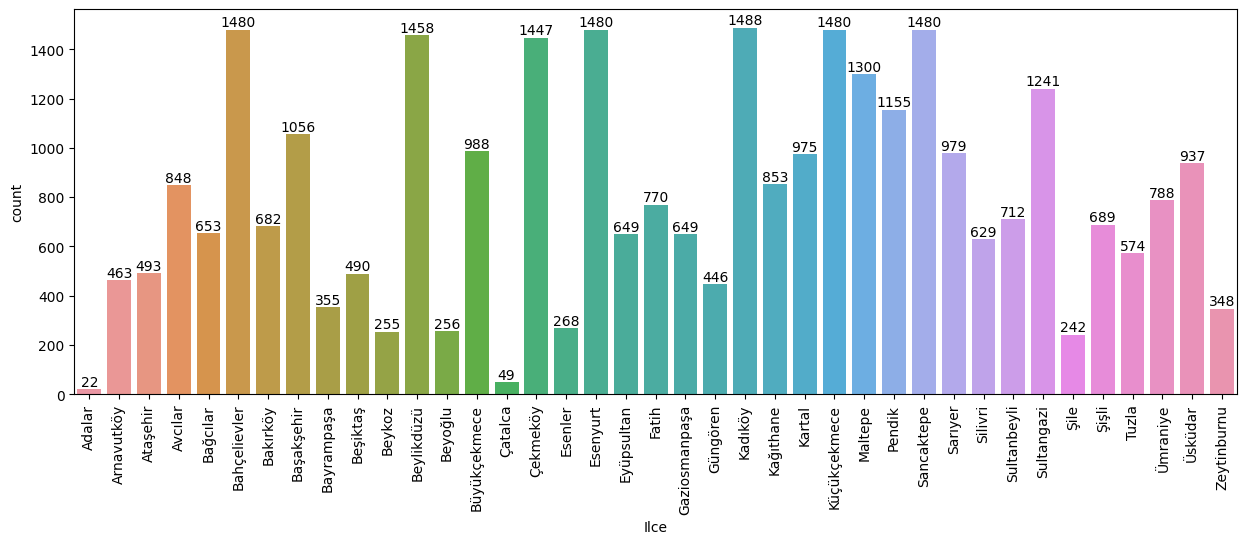

In [23]:
plt.figure(figsize=(15,5))
df_copy = df[df["Sehir"]=="İstanbul"]
ax = sns.countplot(x="Ilce",data=df_copy)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

11- Farklı bina yaşına sahip evlerin ortalama fiyatı nedir? (İl bazında)

In [24]:
pd.crosstab(df["Sehir"], columns=df["Binanın Yaşı"], values=df["Fiyat"], aggfunc='mean')

Binanın Yaşı,0 (Yeni),1,11-15,16-20,2,21 Ve Üzeri,3,4,5-10
Sehir,,,,,,,,,
Adana,3458684.814,2603663.636,3851848.875,3280754.386,2043219.512,2522677.123,2711490.323,2466958.544,3662403.025
Adıyaman,2392750.000,1741111.111,2048090.909,1603750.000,2380833.333,2095000.000,2381666.667,1980937.500,2808918.919
Afyonkarahisar,3381810.212,2179647.059,2517250.000,26630330.645,2328214.286,1802419.048,2307500.000,1799571.429,1850689.067
Aksaray,3022083.333,1640000.000,2241538.462,2823985.714,1600000.000,2043333.333,2783750.000,2008750.000,2228214.286
Amasya,2329666.667,1846428.571,1986923.077,1543333.333,1602400.000,1817307.692,2079545.455,1850000.000,2376489.362
Ankara,4239931.447,4225368.812,2533607.507,2502389.309,3921842.429,2433016.417,3850877.042,3358057.184,2932360.421
Antalya,5641350.401,6316420.596,5520757.604,5615855.273,5808678.071,6633167.931,7209459.694,5362935.337,5929218.438
Ardahan,1125000.000,NaN,NaN,NaN,NaN,NaN,NaN,1225000.000,1100000.000
Artvin,2500000.000,2180000.000,NaN,1250000.000,2550000.000,NaN,NaN,NaN,2466666.667


In [25]:
df.groupby("Binanın Yaşı")["Fiyat"].mean().sort_values(ascending=False)

Binanın Yaşı
0 (Yeni)      4782758.685
11-15         4584166.796
1             4499938.122
2             4395758.460
4             4377340.662
5-10          4364779.726
16-20         4241925.578
3             4221083.086
21 Ve Üzeri   3791848.696
Name: Fiyat, dtype: float64

In [26]:
crosstab = pd.crosstab(df["Tipi"], columns=df["Binanın Yaşı"], values=df["Fiyat"], aggfunc='mean')
crosstab.index.name = "Tip"
crosstab.columns.name = "Binanın Yaşı"
crosstab

Binanın Yaşı,0 (Yeni),1,11-15,16-20,2,21 Ve Üzeri,3,4,5-10
Tip,,,,,,,,,
Daire,3465594.784,3412161.118,3259626.489,3093446.912,3514648.663,2904693.761,3381817.711,3605160.841,3373562.126
Dağ Evi,3242142.857,5337500.000,6381250.000,2260000.000,1350000.000,5266666.667,4983333.333,NaN,5800000.000
Devremülk,125071.429,5500000.000,235909.091,220555.556,220750.000,1435937.500,175000.000,112111.111,226347.458
Kooperatif,843321.839,1677500.000,1800000.000,NaN,1768750.000,6850000.000,1950000.000,NaN,1990000.000
Köy Evi,3211899.950,2381000.000,3356000.000,2599423.077,3513888.889,2213752.688,2359090.909,4652500.000,3418545.455
Köşk,11183333.333,1367500.000,92500000.000,43750000.000,NaN,26322241.362,NaN,NaN,65300000.000
Müstakil Ev,7615404.217,4933550.388,6617671.135,4728181.020,5278980.382,5013129.676,6274062.500,7927706.294,9046013.734
Prefabrik,632855.237,980400.000,NaN,730000.000,2163333.333,NaN,2532000.000,NaN,1669714.286
Residence,16830119.466,12738212.500,26829827.957,41009687.500,13118273.810,22168750.000,10104000.011,13135484.861,11283198.340


12- İstanbulda ilçelerdeki ortalama fiyat nedir?

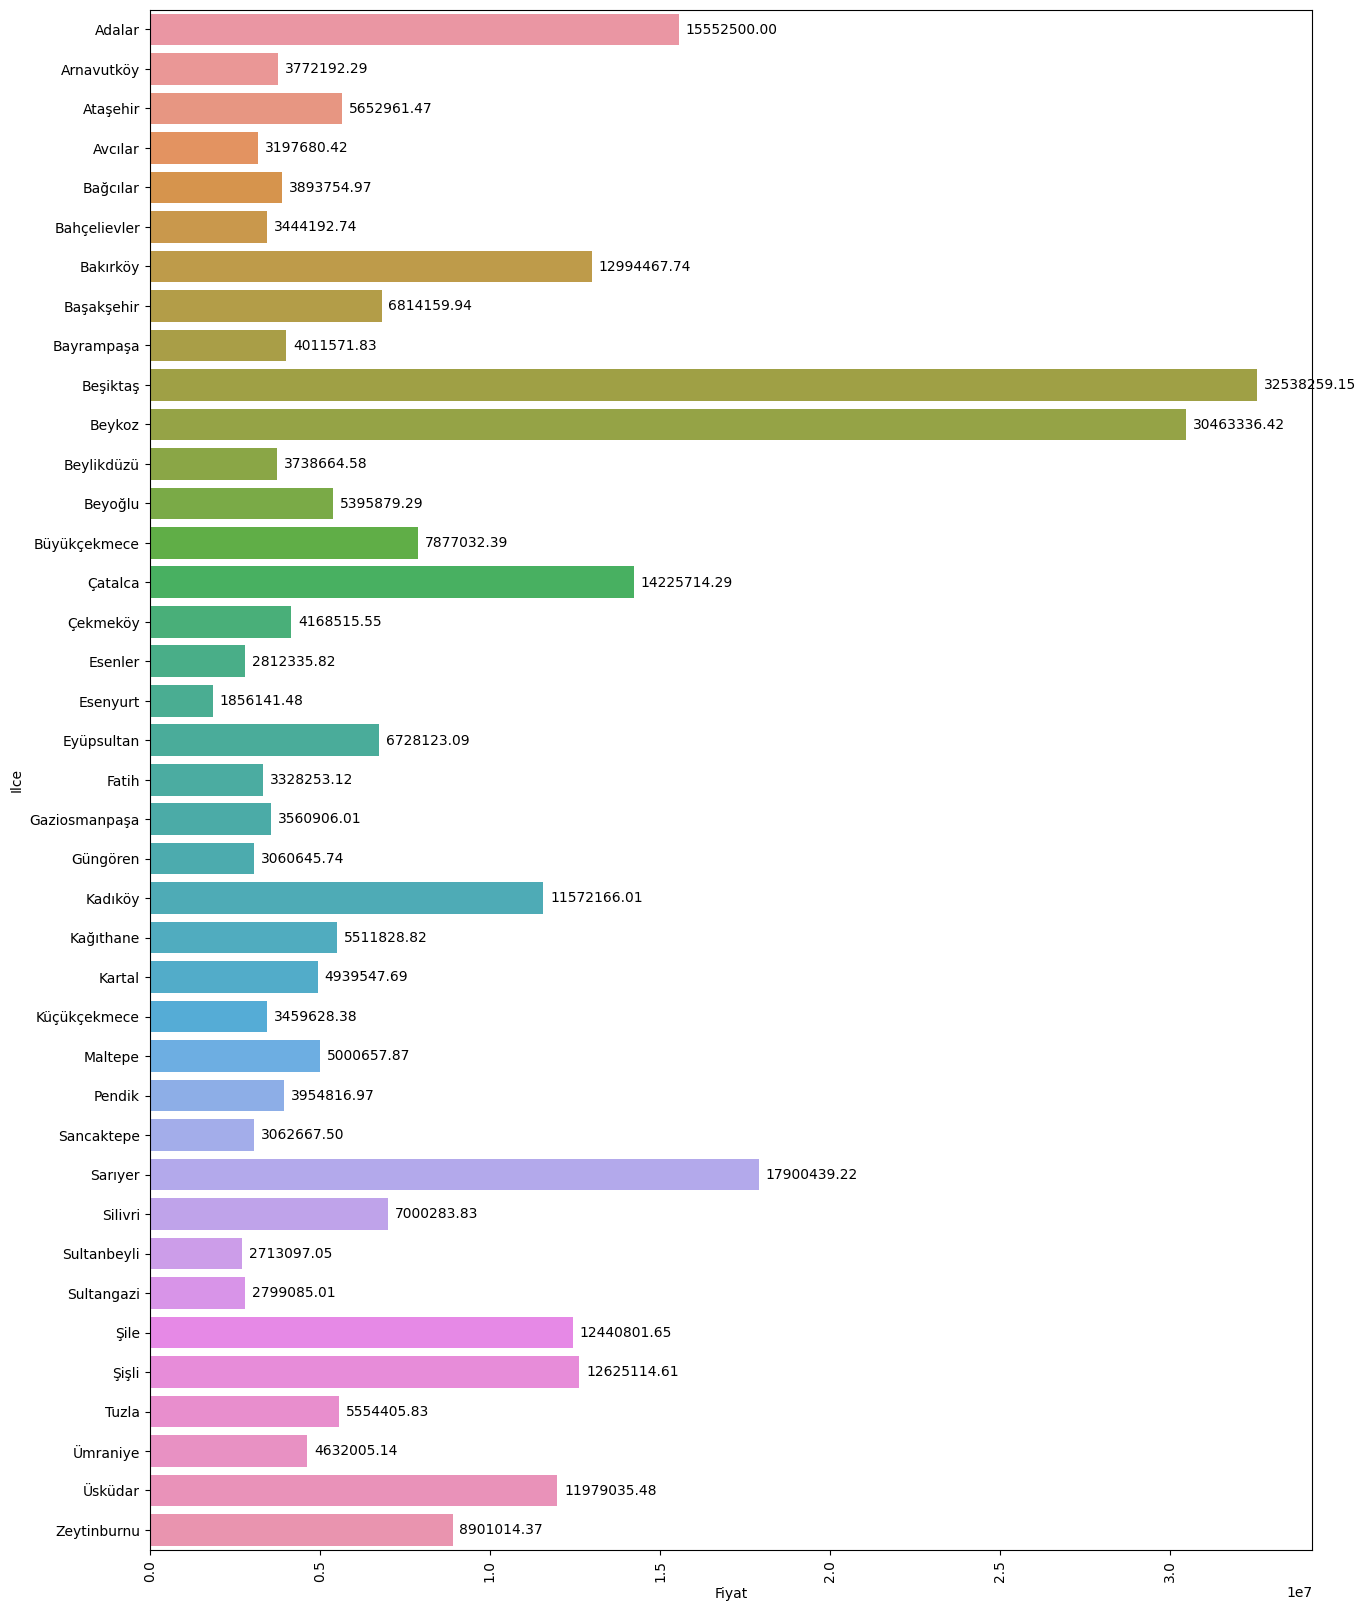

In [27]:
plt.figure(figsize=(15,20))
df_copy = df[df["Sehir"]=="İstanbul"]
ax = sns.barplot(x="Fiyat", y="Ilce", data=df_copy,orient='h', ci = 0)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, padding=5)
plt.xticks(rotation=90)
plt.show()

13- Ev tipine göre fiyat dağılımı nedir?

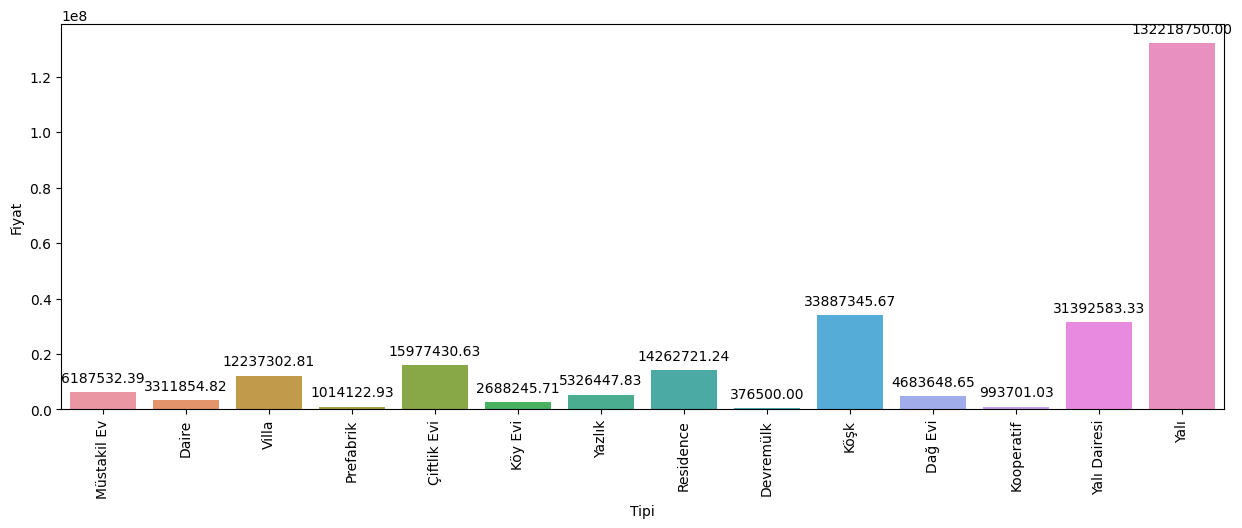

In [28]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Tipi", y="Fiyat", data=df, ci = 0)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, padding=5)
plt.xticks(rotation=90)
plt.show()

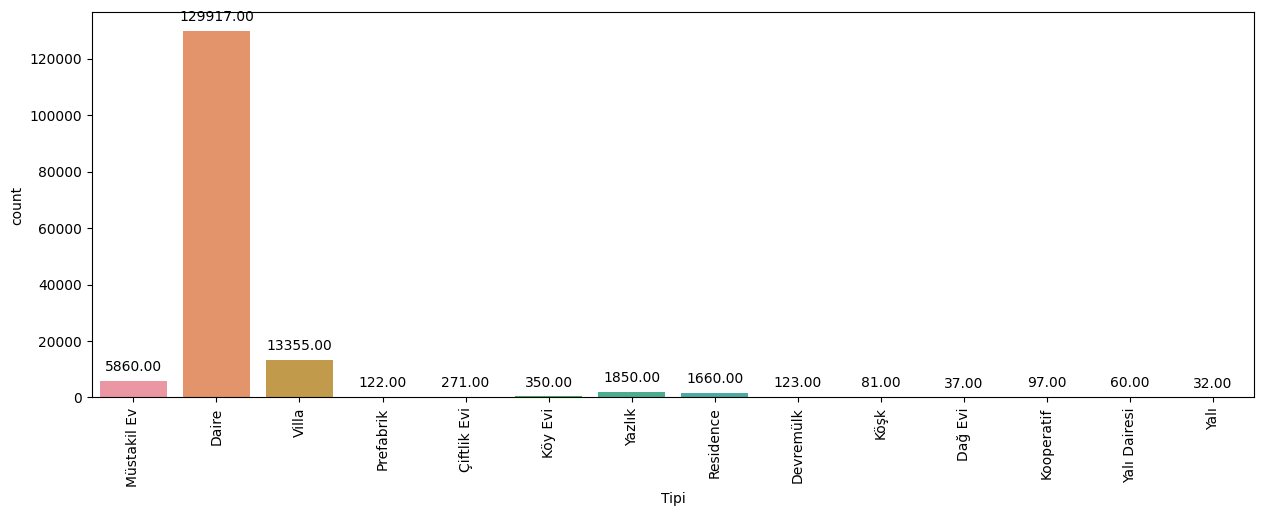

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tipi", data=df)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, padding=5)
plt.xticks(rotation=90)
plt.show()

14- Yatırıma uygun olup olmama durumunun fiyata kayda değer bir etkisi var mıdır?

In [30]:
df.groupby("Yatırıma Uygunluk")["Fiyat"].agg(["count","mean"])

,count,mean
Yatırıma Uygunluk,,
Yatırıma Uygun,54452,4224249.402
Yatırıma Uygun Değil,141,3245805.489


15- Tapu durumunun fiyata kayda değer bir etkisi var mıdır?

In [31]:
df.groupby("Tapu Durumu")["Fiyat"].agg(["count","mean"])

,count,mean
Tapu Durumu,,
Arsa Tapulu,2464,3837359.027
Hisseli Tapu,837,5408378.755
Kat Mülkiyeti,40346,4518832.866
Kat İrtifakı,12871,3680983.457
Müstakil Tapulu,2330,5492736.076


16- Ev tiplerinin illere göre dağılımı nasıldır? 

In [32]:
pd.crosstab(df["Sehir"], columns=df["Tipi"], values=df["Fiyat"], aggfunc=["count"])

count                                                                                                                             
Tipi               Daire Dağ Evi Devremülk Kooperatif Köy Evi   Köşk Müstakil Ev Prefabrik Residence    Villa   Yalı Yalı Dairesi  Yazlık Çiftlik Evi
Sehir                                                                                                                                                
Adana           2629.000     NaN     1.000        NaN   1.000    NaN     355.000     6.000     3.000  143.000    NaN          NaN   6.000       5.000
Adıyaman         128.000     NaN       NaN        NaN     NaN    NaN       6.000       NaN       NaN    8.000    NaN          NaN     NaN         NaN
Afyonkarahisar   465.000     NaN    11.000        NaN   1.000    NaN      60.000       NaN       NaN   23.000    NaN          NaN     NaN       3.000
Aksaray           99.000     NaN       NaN        NaN     NaN    NaN       3.000       NaN     2.000    8.000    NaN          NaN     NaN         NaN
Amasya           185.000     NaN       NaN        NaN     NaN    NaN      14.000       NaN       NaN    3.000    NaN          NaN     NaN         NaN
Ankara         11253.000   3.000    14.000     13.000   1.000  4.000     102.000     2.000    28.000  417.000    NaN          NaN   2.000      13.000
Antalya         7462.000     NaN       NaN        NaN   7.000    NaN      98.000    18.000   141.000  750.000  1.000          NaN  29.000       3.000
Ardahan            5.000     NaN       NaN        NaN     NaN    NaN         NaN       NaN       NaN      NaN    NaN          NaN     NaN         NaN
Artvin             7.000     NaN       NaN        NaN     NaN    NaN         NaN       NaN       NaN      NaN    NaN          NaN     NaN         NaN
Aydın           3664.000   1.000       NaN      1.000  37.000  1.000     294.000       NaN    25.000 1178.000    NaN          NaN 287.000      11.000
Ağrı               1.000     NaN       NaN        NaN     NaN    NaN       1.000       NaN       NaN      NaN    NaN          NaN     NaN         NaN
Balıkesir       6787.000   2.000    20.000        NaN  54.000  5.000     858.000     1.000     5.000 1698.000  5.000        1.000 115.000      26.000
Bartın           159.000     NaN       NaN        NaN     NaN    NaN       8.000       NaN       NaN    6.000    NaN          NaN   2.000         NaN
Batman           348.000     NaN       NaN        NaN     NaN    NaN       5.000       NaN       NaN    3.000    NaN          NaN     NaN       1.000
Bayburt           56.000     NaN       NaN        NaN     NaN    NaN         NaN       NaN       NaN    1.000    NaN          NaN     NaN         NaN
Bilecik           57.000     NaN       NaN        NaN   1.000    NaN       5.000       NaN       NaN    3.000    NaN          NaN     NaN         NaN
Bingöl            31.000     NaN       NaN        NaN     NaN    NaN       1.000       NaN       NaN      NaN    NaN          NaN     NaN         NaN
Bitlis            15.000     NaN       NaN        NaN     NaN    NaN         NaN       NaN       NaN      NaN    NaN          NaN   1.000         NaN
Bolu             173.000   2.000    10.000        NaN   1.000    NaN      13.000       NaN       NaN    9.000    NaN          NaN     NaN       2.000
Burdur           106.000     NaN       NaN        NaN   2.000    NaN      15.000       NaN       NaN    4.000    NaN          NaN     NaN       3.000
Bursa           4473.000   3.000       NaN        NaN  18.000  8.000     332.000    18.000     3.000  206.000    NaN        2.000  13.000       9.000
Denizli         2183.000     NaN     1.000        NaN   5.000    NaN      85.000     1.000    12.000   53.000    NaN          NaN   4.000       4.000
Diyarbakır      1912.000     NaN     1.000        NaN     NaN  1.000       3.000       NaN     1.000   64.000    NaN          NaN     NaN         NaN
Düzce            433.000     NaN       NaN        NaN   1.000    NaN      30.000       NaN       NaN   33.000    NaN   

In [33]:
df[(df["Tipi"]=="Yalı") | (df["Tipi"]=="Yalı Dairesi")].groupby("Sehir")["Fiyat"].agg(["count","mean","max","min"])

,count,mean,max,min
Sehir,,,,
Antalya,1,21000000.000,21000000,21000000
Balıkesir,6,63958333.333,150000000,15250000
Bursa,2,2225000.000,2350000,2100000
Kocaeli,6,15250000.000,32000000,2000000
Kırklareli,1,3350000.000,3350000,3350000
Mersin,1,4500000.000,4500000,4500000
Muğla,2,57675000.000,70350000,45000000
Tekirdağ,1,7555000.000,7555000,7555000
Yalova,2,18750000.000,21500000,16000000


In [34]:
df[((df["Tipi"]=="Yalı") | (df["Tipi"]=="Yalı Dairesi")) & (df["Sehir"] == "İstanbul")].sort_values("Fiyat",ascending=False)

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
45200,714000000,5,<NA>,Merkezi Doğalgaz,Krediye Uygun,İkinci El,Hisseli Tapu,NaN,Hayır,Yalı,900,5-10,3,Mülk Sahibi Oturuyor,Yatırıma Uygun,4,<NA>,4,İstanbul,Üsküdar,Kandilli Mahallesi
39707,370000000,5,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Yalı,450,21 Ve Üzeri,2,Boş,Yatırıma Uygun,4,<NA>,<NA>,İstanbul,Sarıyer,Rumeli Hisarı Mahallesi
39622,360000000,5,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,NaN,NaN,Hayır,Yalı,625,21 Ve Üzeri,4,Mülk Sahibi Oturuyor,NaN,4,<NA>,<NA>,İstanbul,Sarıyer,Yeniköy Mahallesi
39514,350000000,6,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Evet,Yalı,350,21 Ve Üzeri,3,Boş,Yatırıma Uygun,3,<NA>,<NA>,İstanbul,Sarıyer,Yeniköy Mahallesi
21379,270000000,7,<NA>,Kombi Doğalgaz,Krediye Uygun,NaN,Kat Mülkiyeti,NaN,Hayır,Yalı,450,21 Ve Üzeri,3,Boş,Yatırıma Uygun,5,<NA>,<NA>,İstanbul,Beykoz,Kanlıca Mahallesi
21278,270000000,7,<NA>,Merkezi Doğalgaz,Krediye Uygun,NaN,Kat Mülkiyeti,Boş,Hayır,Yalı,450,16-20,3,Boş,NaN,5,<NA>,5,İstanbul,Beykoz,Kanlıca Mahallesi
21306,205000000,7,<NA>,Kombi Doğalgaz,NaN,İkinci El,NaN,NaN,Hayır,Yalı,450,21 Ve Üzeri,4,Kiracı Oturuyor,NaN,3,<NA>,<NA>,İstanbul,Beykoz,Yalıköy Mahallesi
39504,185000000,7,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Yalı,1600,16-20,3,Boş,Yatırıma Uygun,2,<NA>,2,İstanbul,Sarıyer,Baltalimanı Mahallesi
21463,182500000,4,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,Kat Mülkiyeti,Eşyalı,Hayır,Yalı,200,5-10,2,Mülk Sahibi Oturuyor,NaN,2,2,2,İstanbul,Beykoz,Yalıköy Mahallesi
45300,165000000,10,<NA>,Kombi Doğalgaz,Krediye Uygun,İkinci El,NaN,NaN,Hayır,Yalı,650,21 Ve Üzeri,4,Boş,NaN,4,<NA>,<NA>,İstanbul,Üsküdar,Kandilli Mahallesi


17- Tipi daire olan konutların fiyat dağılımı illere göre nasıldır?

In [35]:
df[df["Tipi"]=="Daire"].groupby("Sehir")["Fiyat"].agg(["count","mean","max","min"]).sort_values(by="mean",ascending=False)

,count,mean,max,min
Sehir,,,,
Afyonkarahisar,465,5286803.224,1520000000,20000
İstanbul,28421,4832296.183,212000000,30000
Muğla,3365,4703458.546,500000000,110000
Antalya,7462,4601966.601,129000000,100000
Mersin,4886,3966174.272,2400000000,20000
Zonguldak,201,3827886.677,111111111,720000
İzmir,11279,3365058.132,67500000,23500
Bartın,159,3089189.377,111111111,890000
Balıkesir,6787,3036315.471,1000000000,300000


In [36]:
df.groupby("Sehir")["Fiyat"].agg(["count","mean","max","min"]).sort_values(by="mean",ascending=False)

,count,mean,max,min
Sehir,,,,
Muğla,5530,9150447.971,570000000,110000
İstanbul,31127,6410270.030,714000000,30000
Antalya,8509,5825159.481,1150000000,10000
İzmir,15224,5121868.600,200000000,23500
Afyonkarahisar,563,5044135.876,1520000000,20000
Edirne,573,4914673.646,1285000000,275000
Balıkesir,9577,4737876.402,1000000000,39000
Bartın,175,4644556.189,111111111,890000
Aydın,5499,4359471.538,46000000,80000


18- Dairelerin bulunduğu kat sayısının ve binanın kaç katlı olduğunun fiyata etkisi nasıldır?

In [37]:
df[(df["Tipi"] == "Daire") & (df["Bulunduğu Kat"] < 0)].groupby("Bulunduğu Kat")["Fiyat"].agg(["count","mean","max","min"])

,count,mean,max,min
Bulunduğu Kat,,,,
-4,61,2615081.967,17500000,24000
-3,266,2632834.211,23000000,30000
-2,493,2186521.744,17500000,145000
-1,1364,1915323.520,150000000,90000


19- Isıtma tipini fiyat üzerindeki etkisi nasıldır?

In [38]:
df.groupby("Isıtma Tipi")["Fiyat"].agg(["count","mean"]).sort_values(by="mean",ascending=False)

,count,mean
Isıtma Tipi,,
Fancoil Ünitesi,49,38861224.490
VRV,182,22307829.670
Isı Pompası,617,11923641.815
Şömine,334,10410765.569
Yerden Isıtma,9510,7891615.538
Merkezi (Pay Ölçer),9071,6468068.548
Kat Kaloriferi,3547,6233689.630
Elektrikli Radyatör,68,6188779.397
Merkezi Fueloil,65,5786192.308


In [39]:
df[df["Isıtma Tipi"] == "Şömine"].groupby(["Tipi"])["Fiyat"].agg(["count","mean"]).sort_values(by="mean",ascending=False)

,count,mean
Tipi,,
Çiftlik Evi,15,18053713.333
Villa,186,11823354.839
Müstakil Ev,56,9906767.857
Residence,1,9900000.000
Dağ Evi,4,8833750.000
Yazlık,13,8328076.923
Daire,50,5588380.000
Yalı Dairesi,1,3350000.000
Köy Evi,6,2333000.000


In [40]:
df[df["Isıtma Tipi"] == "Sobalı"].groupby(["Tipi","Binanın Yaşı"])["Fiyat"].agg(["count","mean"])

count          mean
Tipi         Binanın Yaşı                     
Daire        0 (Yeni)        114   2938000.000
             1                21   2445666.667
             11-15           197   2112142.132
             16-20           309   5062569.777
             2                32   2169500.000
             21 Ve Üzeri     883   1682936.462
             3                23   4622826.087
             4                43   2215186.047
             5-10            233   2558145.918
Dağ Evi      0 (Yeni)          3   1256666.667
             1                 2   4050000.000
             11-15             7   5507142.857
             16-20             4   2362500.000
             2                 1   1350000.000
             21 Ve Üzeri       2   3525000.000
             3                 2   3625000.000
             5-10              5   3060000.000
Devremülk    21 Ve Üzeri       1   1625000.000
Kooperatif   0 (Yeni)          1    800000.000
             2                 2   1787500.000
             21 Ve Üzeri       1   6850000.000
Köy Evi      0 (Yeni)          4   2117500.000
             1                 3   2365000.000
             11-15            25   2935760.000
             16-20            20   2249250.000
             2                 4   2623750.000
             21 Ve Üzeri     144   2023291.667
             3                 7   2307142.857
             4                 4   1668750.000
             5-10             29   3619517.241
Köşk         21 Ve Üzeri      12   5447916.667
Müstakil Ev  0 (Yeni)         87   2480025.575
             1                35   2917571.429
             11-15           169   3356715.970
             16-20           225   2745075.542
             2                34   2580588.235
             21 Ve Üzeri     940   3873470.468
             3                39   3245769.231
             4                38   4217868.421
             5-10            230   9341973.913
Prefabrik    0 (Yeni)         11    155181.818
             1                 1     57000.000
             2                 1   2500000.000
             3                 2   2532000.000
             5-10              4   2571250.000
Villa        0 (Yeni)         46   4315391.304
             1                10   5581000.000
             11-15            33   7518939.394
             16-20            34   7566176.471
             2                12   6278750.000
             21 Ve Üzeri      37   5740405.405
             3                 9   6233111.111
             4                14   6500714.286
             5-10             42   6672476.190
Yalı         21 Ve Üzeri       2 117500000.000
Yalı Dairesi 21 Ve Üzeri       1   2100000.000
Yazlık       0 (Yeni)         11   2379090.909
             1                 9   3342777.778
             11-15            15   3278000.000
             16-20            18   3738888.889
             21 Ve Üzeri      31   5050967.742
             3                 2   5250000.000
             4                 4   4106250.000
             5-10             21   4449523.810
Çiftlik Evi  0 (Yeni)          9   7516666.667
             1                 6   2323333.333
             11-15            13  18096153.846
             16-20             9   7470000.000
             2                 3   4200000.000
             21 Ve Üzeri      16   9248750.000
             3                 6   2224166.667
             4                 5   4728000.000
             5-10             31   7436290.323

20- Ortalama fiyatı ülke genelindeki ortalama ev fiyatından daha yüksek olan illerde konut tipine göre nasıl bir dağılım vardır?

In [41]:
avg = df["Fiyat"].mean()
sehir_avg = df.groupby(["Sehir"])["Fiyat"].mean()
sehirler = sehir_avg.where(lambda x : x > avg).dropna()
print(sehirler,"\n")
df[df["Sehir"].isin(sehirler.index)].groupby(["Sehir","Tipi"])["Fiyat"].mean()

Sehir
Afyonkarahisar   5044135.876
Antalya          5825159.481
Balıkesir        4737876.402
Bartın           4644556.189
Edirne           4914673.646
Muğla            9150447.971
İstanbul         6410270.030
İzmir            5121868.600
Name: Fiyat, dtype: float64 



Sehir           Tipi        
Afyonkarahisar  Daire            5286803.224
                Devremülk          94545.455
                Köy Evi          1990000.000
                Müstakil Ev      2726666.667
                Villa            8454565.174
                Çiftlik Evi      6800000.000
Antalya         Daire            4601966.601
                Köy Evi          3660714.286
                Müstakil Ev     18142091.837
                Prefabrik         657388.889
                Residence        7276605.823
                Villa           16026245.111
                Yalı            21000000.000
                Yazlık           4747896.552
                Çiftlik Evi     68883333.333
Balıkesir       Daire            3036315.471
                Dağ Evi          1650000.000
                Devremülk         284800.000
                Köy Evi          2646648.148
                Köşk           109250000.000
                Müstakil Ev      7375312.586
                Prefabrik 

### DATA VISUALIZATION

In [42]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100*dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        plt.figure(figsize=(15,5))
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.xticks(rotation=90)
        plt.show()
    print("===============================")
    

In [43]:
df.columns

Index(['Fiyat', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Yapı Durumu', 'Tapu Durumu', 'Eşya Durumu',
       'Site İçerisinde', 'Tipi', 'Brüt Metrekare', 'Binanın Yaşı',
       'Binanın Kat Sayısı', 'Kullanım Durumu', 'Yatırıma Uygunluk',
       'Banyo Sayısı', 'Balkon Sayısı', 'WC Sayısı', 'Sehir', 'Ilce',
       'Mahalle'],
      dtype='object')

                     Isıtma Tipi  Ratio
Kombi Doğalgaz             90934 59.119
Klimalı                    19569 12.722
Yerden Isıtma               9510  6.183
Merkezi (Pay Ölçer)         9071  5.897
Merkezi Doğalgaz            7432  4.832
Sobalı                      4403  2.863
Isıtma Yok                  4360  2.835
Kat Kaloriferi              3547  2.306
Doğalgaz Sobalı             1386  0.901
Merkezi Kömür                917  0.596
Jeotermal                    749  0.487
Isı Pompası                  617  0.401
Güneş Enerjisi               405  0.263
Şömine                       334  0.217
VRV                          182  0.118
Kombi Fueloil                147  0.096
Elektrikli Radyatör           68  0.044
Merkezi Fueloil               65  0.042
Fancoil Ünitesi               49  0.032
Kombi Kömür                   43  0.028
Kombi Katı Yakıt              27  0.018


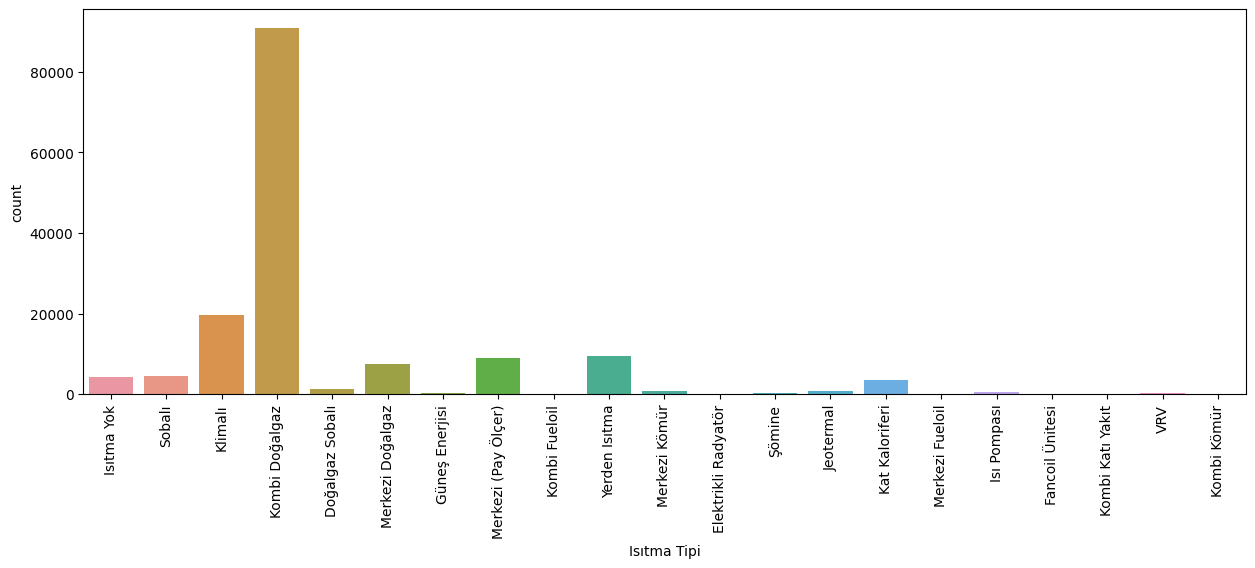

                     Krediye Uygunluk  Ratio
Krediye Uygun                  132025 85.834
Krediye Uygun Değil             13927  9.054


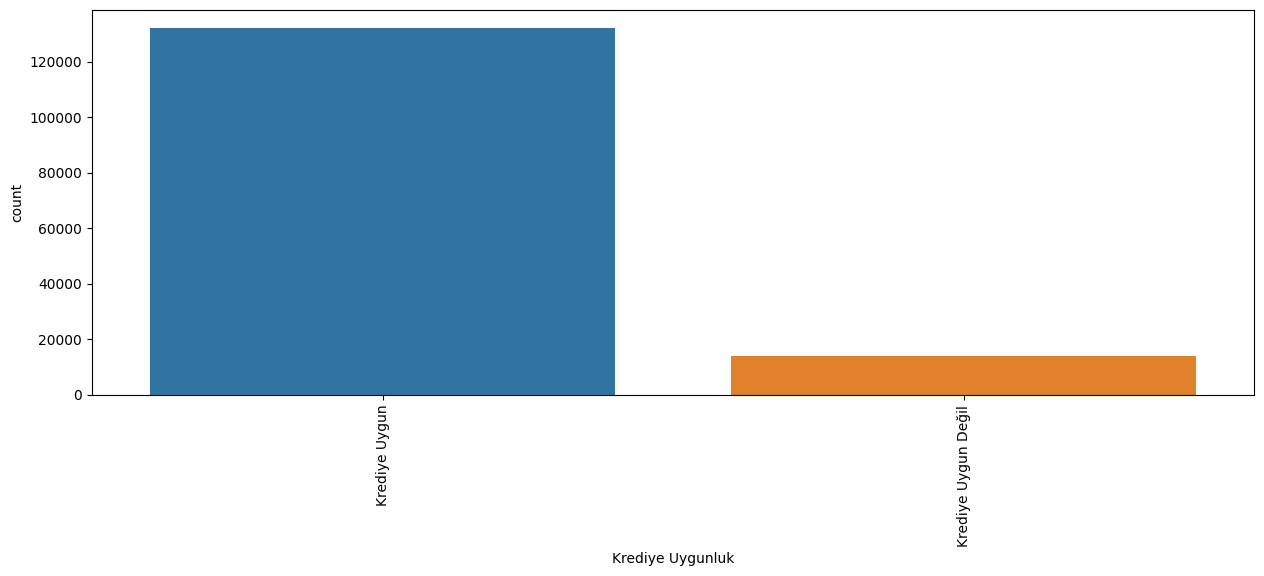

                  Yapı Durumu  Ratio
İkinci El               38901 25.291
Sıfır                   22193 14.428
Yapım Aşamasında          724  0.471


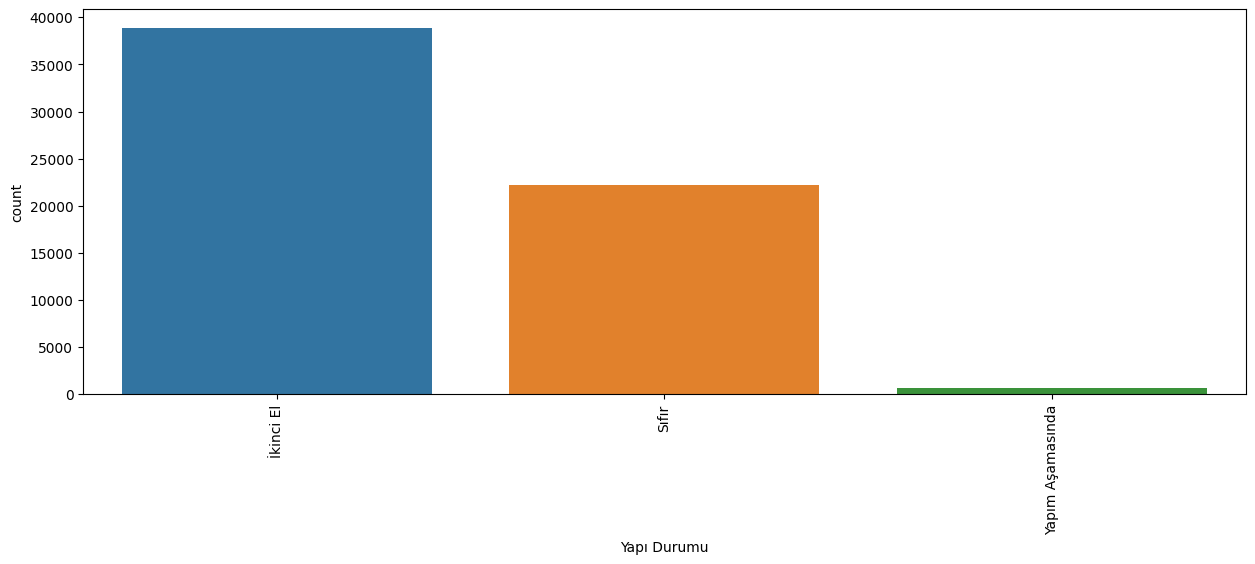

                 Tapu Durumu  Ratio
Kat Mülkiyeti          40346 26.230
Kat İrtifakı           12871  8.368
Arsa Tapulu             2464  1.602
Müstakil Tapulu         2330  1.515
Hisseli Tapu             837  0.544


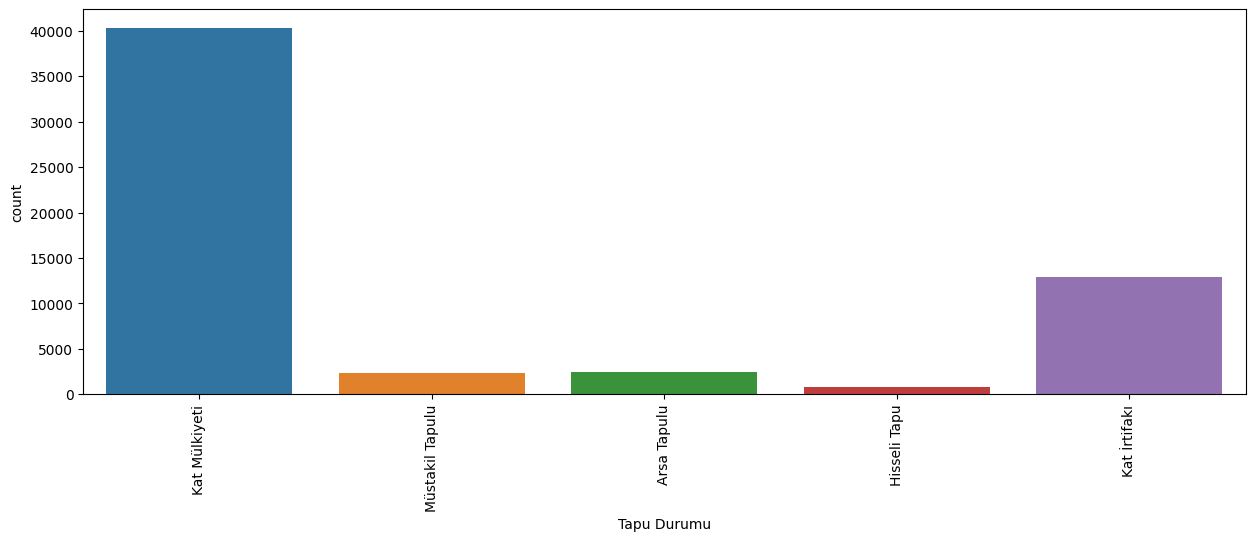

        Eşya Durumu  Ratio
Boş           90649 58.934
Eşyalı        11008  7.157


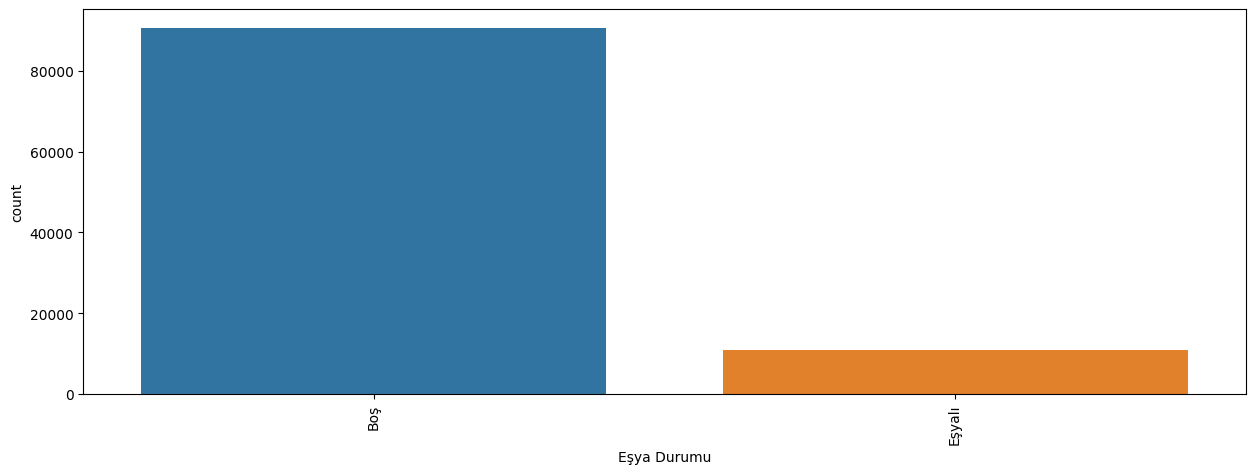

       Site İçerisinde  Ratio
Hayır           128106 83.286
Evet             25709 16.714


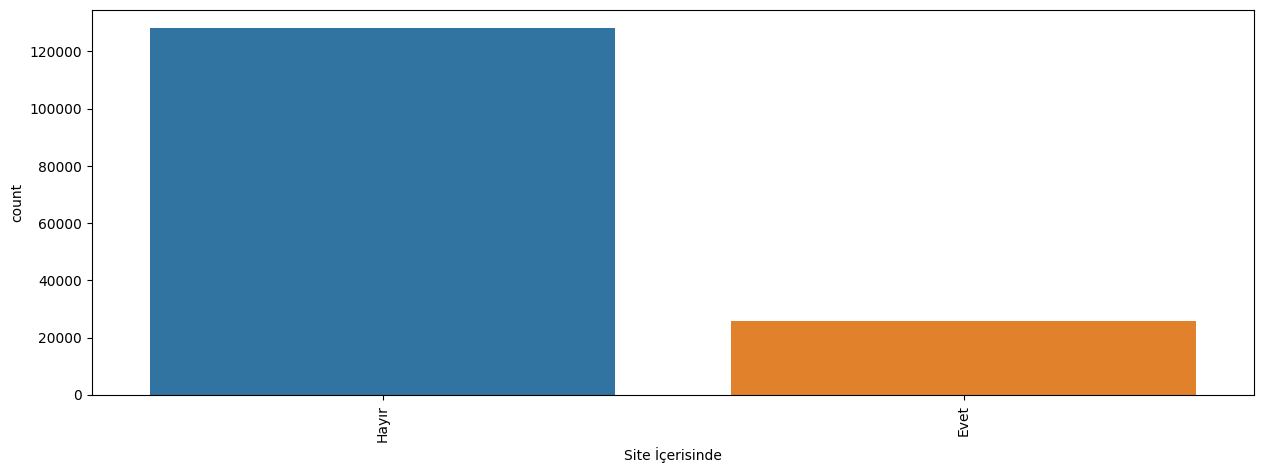

                Tipi  Ratio
Daire         129917 84.463
Villa          13355  8.683
Müstakil Ev     5860  3.810
Yazlık          1850  1.203
Residence       1660  1.079
Köy Evi          350  0.228
Çiftlik Evi      271  0.176
Devremülk        123  0.080
Prefabrik        122  0.079
Kooperatif        97  0.063
Köşk              81  0.053
Yalı Dairesi      60  0.039
Dağ Evi           37  0.024
Yalı              32  0.021


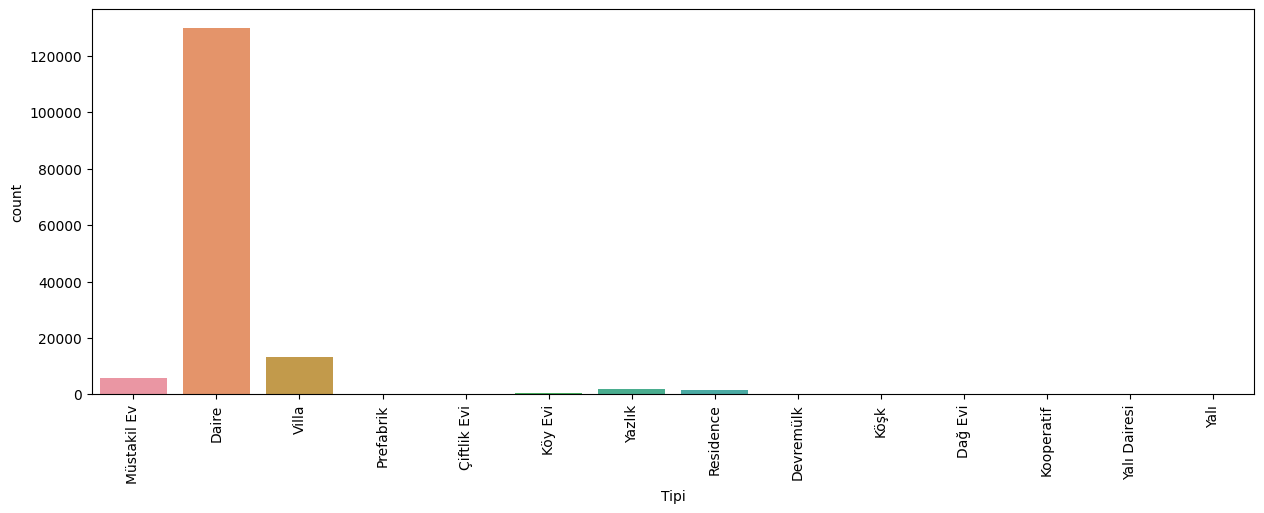

             Binanın Yaşı  Ratio
0 (Yeni)            45892 29.836
5-10                30223 19.649
21 Ve Üzeri         25537 16.602
11-15               15433 10.033
16-20               11584  7.531
4                   10494  6.822
3                    5363  3.487
1                    5022  3.265
2                    4267  2.774


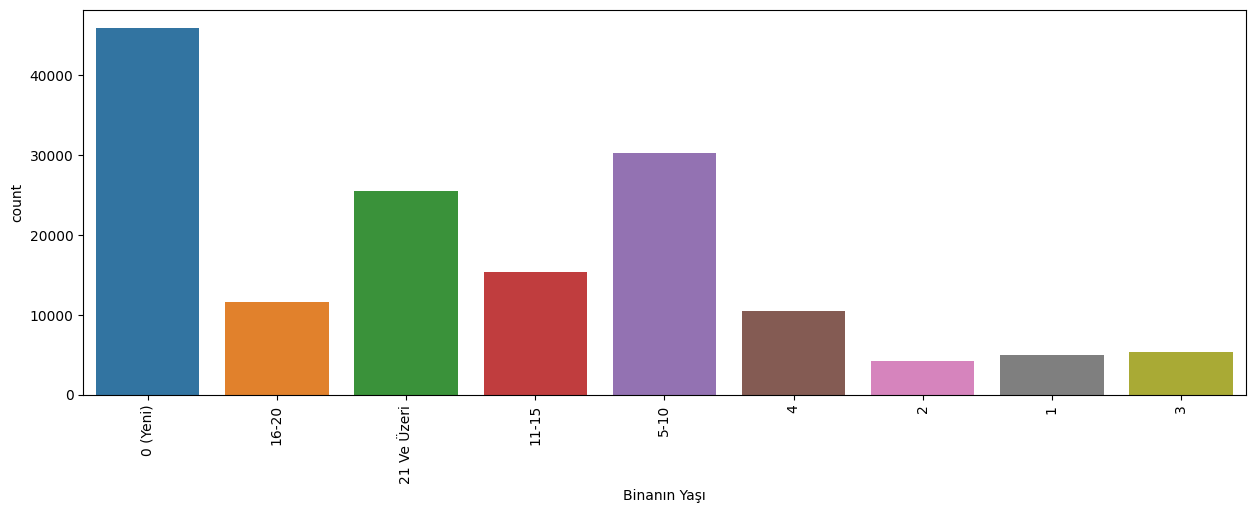

                      Kullanım Durumu  Ratio
Boş                             91783 59.671
Mülk Sahibi Oturuyor            33433 21.736
Kiracı Oturuyor                 28599 18.593


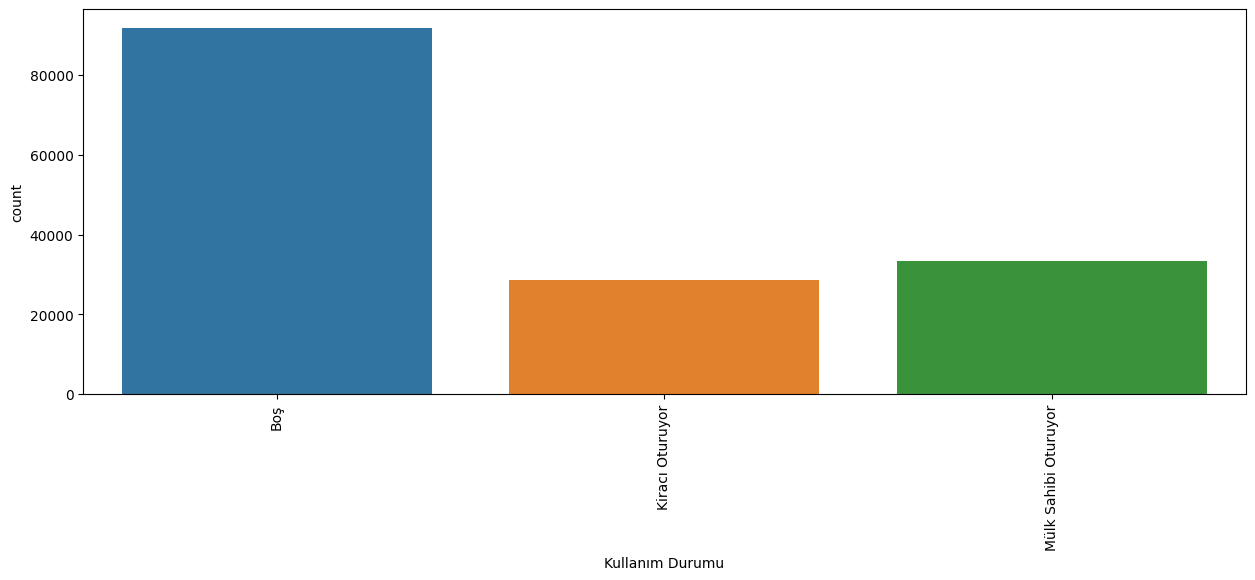

                      Yatırıma Uygunluk  Ratio
Yatırıma Uygun                    54452 35.401
Yatırıma Uygun Değil                141  0.092


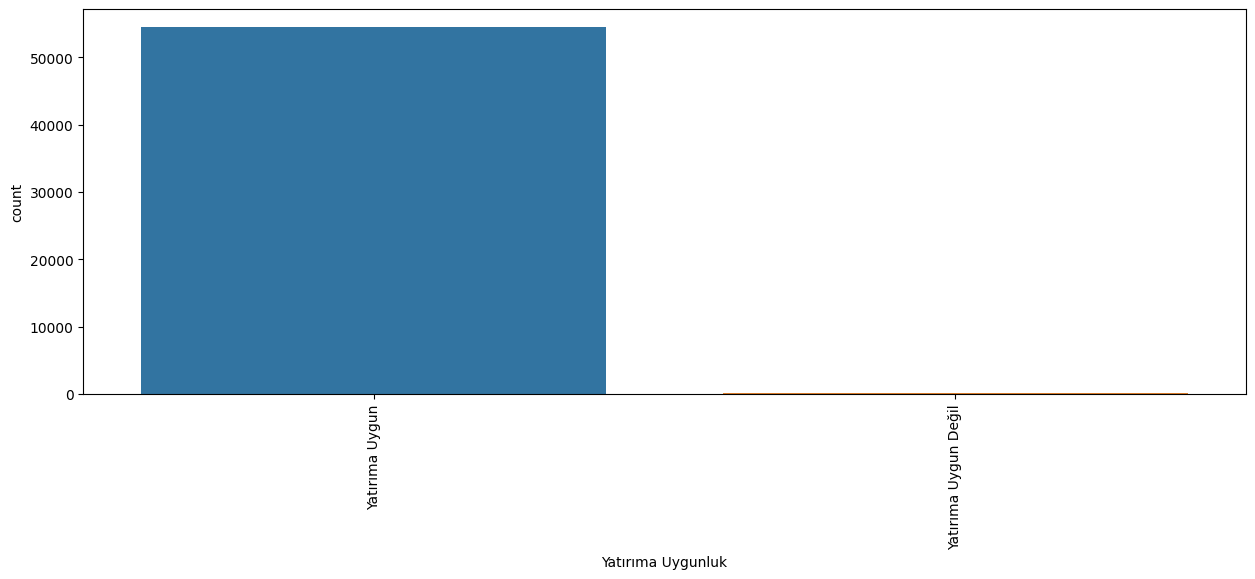

   Banyo Sayısı  Ratio
1         89587 58.243
2         51257 33.324
3          9257  6.018
4          2880  1.872
5           834  0.542


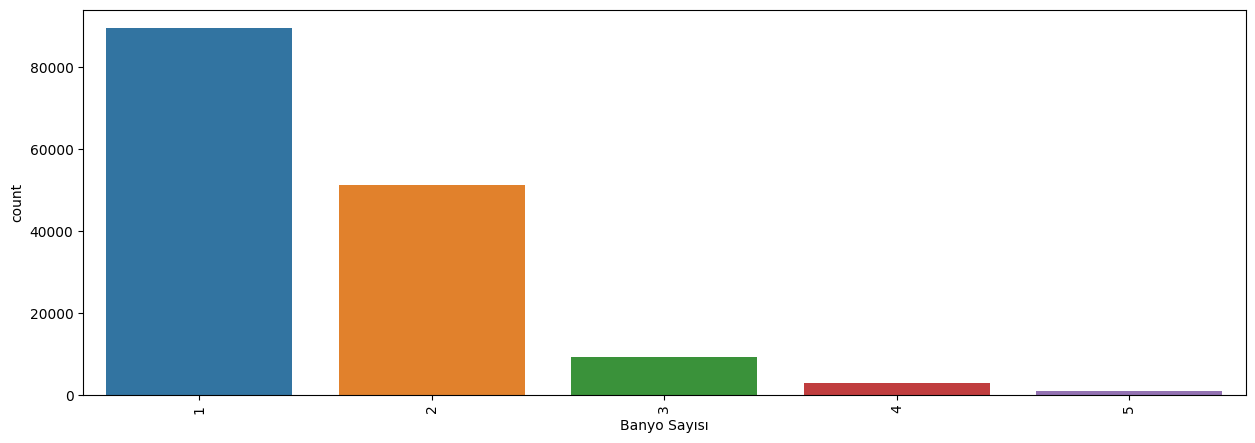

                Sehir  Ratio
İstanbul        31127 20.237
İzmir           15224  9.898
Ankara          11852  7.705
Balıkesir        9577  6.226
Antalya          8509  5.532
Tekirdağ         5720  3.719
Muğla            5530  3.595
Aydın            5499  3.575
Mersin           5477  3.561
Bursa            5085  3.306
Manisa           3365  2.188
Adana            3149  2.047
Samsun           3148  2.047
Gaziantep        3072  1.997
Konya            3015  1.960
Kocaeli          2904  1.888
Sakarya          2865  1.863
Kayseri          2654  1.725
Şanlıurfa        2609  1.696
Eskişehir        2430  1.580
Denizli          2348  1.527
Diyarbakır       1982  1.289
Trabzon          1362  0.885
Yalova           1195  0.777
Çanakkale         992  0.645
Ordu              752  0.489
Sivas             697  0.453
Kırklareli        670  0.436
Van               598  0.389
Edirne            573  0.373
Afyonkarahisar    563  0.366
Kahramanmaraş     560  0.364
Düzce             500  0.325
Malatya       

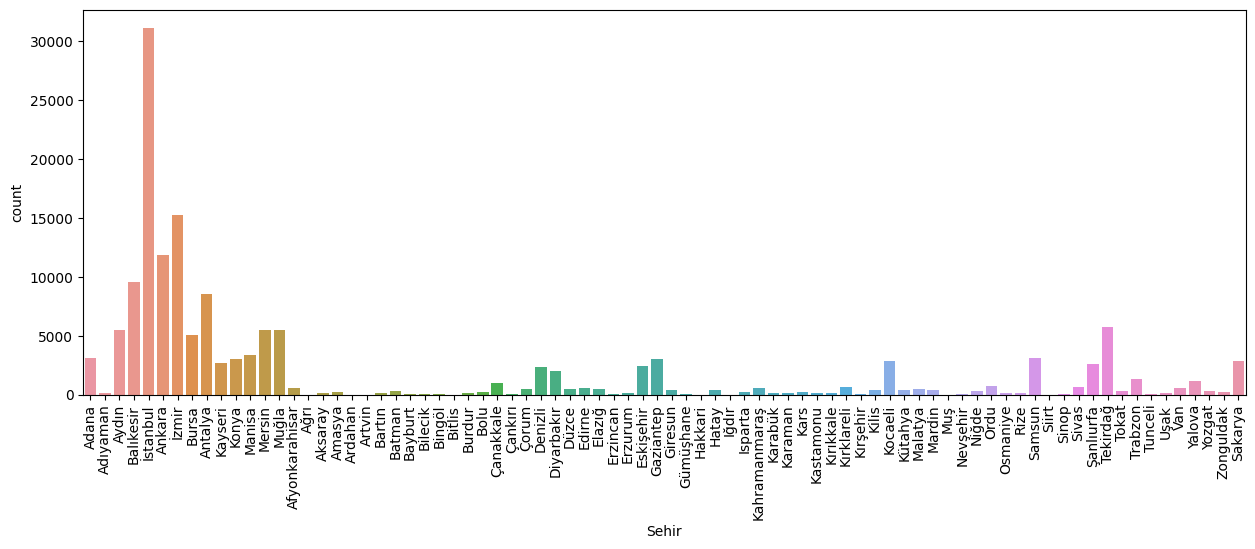

In [44]:
cat_cols = ["Isıtma Tipi","Krediye Uygunluk","Yapı Durumu",'Tapu Durumu', 'Eşya Durumu',
       'Site İçerisinde', 'Tipi','Binanın Yaşı','Kullanım Durumu', 'Yatırıma Uygunluk',
       'Banyo Sayısı', 'Sehir']
for col in cat_cols:
    cat_summary(df, col, plot = True)

### DATA CLEANING

In [45]:
df["Sehir"].value_counts()

İstanbul          31127
İzmir             15224
Ankara            11852
Balıkesir          9577
Antalya            8509
Tekirdağ           5720
Muğla              5530
Aydın              5499
Mersin             5477
Bursa              5085
Manisa             3365
Adana              3149
Samsun             3148
Gaziantep          3072
Konya              3015
Kocaeli            2904
Sakarya            2865
Kayseri            2654
Şanlıurfa          2609
Eskişehir          2430
Denizli            2348
Diyarbakır         1982
Trabzon            1362
Yalova             1195
Çanakkale           992
Ordu                752
Sivas               697
Kırklareli          670
Van                 598
Edirne              573
Afyonkarahisar      563
Kahramanmaraş       560
Düzce               500
Malatya             471
Çorum               463
Elazığ              455
Kütahya             442
Hatay               433
Giresun             432
Mardin              410
Kilis               367
Batman          

In [46]:
df = df[df["Sehir"].isin(df["Sehir"].value_counts()[df["Sehir"].value_counts() > 500].index)]

In [47]:
df.shape

(145103, 21)

In [48]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T
# Fiyat ve Brüt Metrekare bilgilerine odaklanabilirsin

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,145103.000,4529558.254,13736892.392,8500.000,1150000.000,1850000.000,2700000.000,4325000.000,8250000.000,30000000.000,2400000000.000
Oda Sayısı,145103.000,3.785,1.167,1.000,2.000,3.000,4.000,4.000,5.000,8.000,12.000
Bulunduğu Kat,125854.000,3.089,3.056,-4.000,0.000,1.000,2.000,4.000,6.000,15.000,40.000
Brüt Metrekare,145103.000,370.109,44790.771,2.000,65.000,100.000,130.000,170.000,240.000,700.000,16644664.000
Binanın Kat Sayısı,145103.000,5.428,4.297,1.000,2.000,3.000,4.000,6.000,10.000,24.000,99.000
Banyo Sayısı,145103.000,1.537,0.746,1.000,1.000,1.000,1.000,2.000,2.000,4.000,5.000
Balkon Sayısı,40236.000,1.611,0.650,1.000,1.000,1.000,2.000,2.000,2.000,3.000,3.000
WC Sayısı,49679.000,1.682,0.762,1.000,1.000,1.000,2.000,2.000,3.000,4.000,6.000


In [37]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [50]:
outlier_thresholds(df, "Fiyat")

(-8887500.0, 18532500.0)

In [51]:
df[df["Fiyat"] > 30000000].sort_values(by="Fiyat",ascending=False).shape # 1369 adet veri var

(1369, 21)

In [52]:
df[(df["Fiyat"] < 15000000) & (df["Fiyat"] > 750000) & (df["Tipi"] == "Daire")].describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,119342.000,3035749.485,2007332.956,752000.000,1200000.000,1780000.000,2500000.000,3500000.000,5300000.000,11750000.000,14950000.000
Oda Sayısı,119342.000,3.613,0.976,1.000,2.000,3.000,4.000,4.000,5.000,7.000,12.000
Bulunduğu Kat,119342.000,2.999,2.794,-4.000,0.000,1.000,2.000,4.000,6.000,13.000,40.000
Brüt Metrekare,119342.000,359.107,49207.972,2.000,65.000,100.000,125.000,155.000,190.000,310.590,16644664.000
Binanın Kat Sayısı,119342.000,5.738,3.886,1.000,3.000,4.000,5.000,6.000,11.000,21.000,99.000
Banyo Sayısı,119342.000,1.387,0.555,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,33826.000,1.548,0.611,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,40787.000,1.542,0.613,1.000,1.000,1.000,1.000,2.000,2.000,3.000,6.000


In [53]:
for i in df["Sehir"].unique():
    outlier = outlier_thresholds(df[df["Sehir"] == i], "Fiyat")
    print(i, " = " ,int(outlier[1]))

Adana  =  11925000
Aydın  =  21295000
Balıkesir  =  18551500
İstanbul  =  28597015
Ankara  =  10422500
İzmir  =  22599923
Bursa  =  11025000
Antalya  =  24500000
Kayseri  =  10320250
Konya  =  11725000
Manisa  =  6875000
Mersin  =  11467500
Muğla  =  45525000
Afyonkarahisar  =  8128500
Çanakkale  =  17233750
Denizli  =  9061500
Diyarbakır  =  7803750
Edirne  =  8825000
Eskişehir  =  7500000
Gaziantep  =  9525000
Kahramanmaraş  =  9600000
Kırklareli  =  8825000
Kocaeli  =  14675000
Ordu  =  7283750
Samsun  =  7575000
Sivas  =  6875000
Şanlıurfa  =  8055000
Tekirdağ  =  9885249
Trabzon  =  12537500
Van  =  8925000
Yalova  =  13125000
Sakarya  =  11905000


In [54]:
df[(df["Sehir"] == "İstanbul") & (df["Fiyat"] < 28597015)].describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,30298.000,4869154.355,4509446.785,30000.000,1355000.000,2250000.000,3300000.000,5500000.000,10250000.000,24151500.000,28500000.000
Oda Sayısı,30298.000,3.608,1.175,1.000,2.000,3.000,3.000,4.000,5.000,7.000,12.000
Bulunduğu Kat,29158.000,3.480,3.835,-4.000,0.000,1.000,2.000,4.000,7.000,20.000,40.000
Brüt Metrekare,30298.000,239.728,12434.556,20.000,69.000,90.000,115.000,145.000,200.000,448.060,1600000.000
Binanın Kat Sayısı,30298.000,7.091,5.935,1.000,3.000,4.000,5.000,7.000,14.000,30.000,99.000
Banyo Sayısı,30298.000,1.433,0.655,1.000,1.000,1.000,1.000,2.000,2.000,4.000,5.000
Balkon Sayısı,7113.000,1.344,0.565,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,10566.000,1.438,0.628,1.000,1.000,1.000,1.000,2.000,2.000,4.000,6.000


In [55]:
df[(df["Tipi"] == "Yalı") | (df["Tipi"] == "Yalı Dairesi")]["Sehir"].unique()

array(['Balıkesir', 'İstanbul', 'İzmir', 'Bursa', 'Antalya', 'Mersin',
       'Muğla', 'Kırklareli', 'Kocaeli', 'Tekirdağ', 'Yalova'],
      dtype=object)

In [56]:
df[(df["Tipi"] == "Residence")]["Sehir"].unique()

array(['Adana', 'Aydın', 'Balıkesir', 'İstanbul', 'Ankara', 'İzmir',
       'Bursa', 'Antalya', 'Kayseri', 'Konya', 'Manisa', 'Mersin',
       'Muğla', 'Çanakkale', 'Denizli', 'Diyarbakır', 'Eskişehir',
       'Gaziantep', 'Kırklareli', 'Kocaeli', 'Ordu', 'Şanlıurfa',
       'Tekirdağ', 'Trabzon', 'Yalova'], dtype=object)

In [57]:
df = df[df["Tipi"] == "Daire"].copy()

In [58]:
df.drop(df[df["Fiyat"] < 500000].index, axis=0, inplace=True)

In [59]:
for i in df["Sehir"].unique():
    outlier = outlier_thresholds(df[df["Sehir"] == i], "Fiyat")
    print(i, " = " ,int(outlier[1]))
    df.drop(df[(df["Fiyat"] > int(outlier[1])) & (df["Sehir"]==i)].index, axis=0, inplace=True)

Adana  =  8765000
Aydın  =  9350000
Balıkesir  =  8145250
İstanbul  =  19601500
Ankara  =  9055000
İzmir  =  11600000
Bursa  =  8899250
Antalya  =  16810900
Kayseri  =  6374500
Konya  =  7975000
Manisa  =  6440000
Mersin  =  9250000
Muğla  =  17775000
Afyonkarahisar  =  7487500
Çanakkale  =  9400000
Denizli  =  8233250
Diyarbakır  =  6938250
Edirne  =  7575000
Eskişehir  =  6962500
Gaziantep  =  7241250
Kahramanmaraş  =  9538650
Kırklareli  =  6965000
Kocaeli  =  8246250
Ordu  =  6666250
Samsun  =  7312100
Sivas  =  6250000
Şanlıurfa  =  7905250
Tekirdağ  =  6125000
Trabzon  =  9825000
Van  =  7251500
Yalova  =  8050000
Sakarya  =  6025000


In [60]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,120022.000,3032107.619,2125818.240,500000.000,1150000.000,1750000.000,2500000.000,3500000.000,5250000.000,12500000.000,19600000.000
Oda Sayısı,120022.000,3.601,0.970,1.000,2.000,3.000,4.000,4.000,5.000,7.000,12.000
Bulunduğu Kat,120022.000,2.985,2.777,-4.000,0.000,1.000,2.000,4.000,6.000,13.000,40.000
Brüt Metrekare,120022.000,354.534,49059.753,2.000,65.000,98.000,125.000,155.000,190.000,300.000,16644664.000
Binanın Kat Sayısı,120022.000,5.724,3.868,1.000,3.000,4.000,5.000,6.000,11.000,20.000,99.000
Banyo Sayısı,120022.000,1.382,0.551,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,33907.000,1.543,0.609,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,40954.000,1.536,0.608,1.000,1.000,1.000,1.000,2.000,2.000,3.000,6.000


In [61]:
df[df["Fiyat"] < 5250000].shape

(107852, 21)

In [62]:
df["Sehir"].value_counts()

İstanbul          27728
Ankara            11106
İzmir             11062
Antalya            7358
Balıkesir          6710
Mersin             4794
Bursa              4407
Tekirdağ           3869
Aydın              3615
Muğla              3314
Manisa             3121
Samsun             2987
Gaziantep          2641
Adana              2593
Konya              2541
Şanlıurfa          2528
Kocaeli            2462
Eskişehir          2306
Kayseri            2165
Denizli            2161
Diyarbakır         1869
Sakarya            1795
Trabzon            1253
Yalova              980
Çanakkale           724
Ordu                713
Sivas               643
Kırklareli          593
Van                 538
Kahramanmaraş       516
Edirne              472
Afyonkarahisar      458
Name: Sehir, dtype: int64

In [63]:
df[df["Binanın Kat Sayısı"] > 60]

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
26049,1650000,3,8,Merkezi Doğalgaz,Krediye Uygun,İkinci El,Kat Mülkiyeti,NaN,Hayır,Daire,100,5-10,99,Kiracı Oturuyor,Yatırıma Uygun,1,<NA>,1,İstanbul,Esenyurt,Yenikent Mahallesi
85247,12800000,3,3,Isıtma Yok,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,110,21 Ve Üzeri,63,Boş,NaN,1,<NA>,<NA>,Antalya,Muratpaşa,Bahçelievler Mahallesi
148360,2800000,3,2,Kombi Doğalgaz,Krediye Uygun,Sıfır,NaN,NaN,Hayır,Daire,130,0 (Yeni),83,Boş,NaN,2,<NA>,<NA>,Trabzon,Ortahisar,Akyazı Mahallesi


In [64]:
df[df["Brüt Metrekare"] > 1000].sort_values(by="Brüt Metrekare",ascending=False)

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
140966,2700000,5,2,Merkezi Doğalgaz,Krediye Uygun,NaN,Kat İrtifakı,Boş,Evet,Daire,16644664,3,5,Boş,NaN,2,1,2,Şanlıurfa,Karaköprü,Seyrantepe Mahallesi
121133,5890000,5,1,Şömine,NaN,NaN,NaN,NaN,Hayır,Daire,1900000,0 (Yeni),1,Boş,NaN,2,<NA>,<NA>,Eskişehir,Odunpazarı,Yenisofça Mahallesi
18106,1285000,4,1,Kombi Doğalgaz,Krediye Uygun Değil,İkinci El,Hisseli Tapu,Boş,Hayır,Daire,1600000,21 Ve Üzeri,4,Kiracı Oturuyor,Yatırıma Uygun,1,<NA>,1,İstanbul,Bahçelievler,Zafer Mahallesi
18061,2300000,4,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,1450000,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,NaN,1,<NA>,<NA>,İstanbul,Bahçelievler,Çobançeşme Mahallesi
99809,1550000,4,3,Isıtma Yok,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,1350000,16-20,3,Boş,NaN,1,<NA>,<NA>,Mersin,Tarsus,Yeşilevler Mahallesi
99988,1200000,4,1,Isıtma Yok,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,1150000,0 (Yeni),3,Boş,NaN,1,<NA>,<NA>,Mersin,Tarsus,Bağlar Mahallesi
74847,4500000,7,5,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,Daire,300000,11-15,5,Boş,Yatırıma Uygun,2,2,2,Bursa,Mudanya,Yeni Mahallesi
113806,1250000,2,3,Isıtma Yok,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,Daire,250005,5-10,4,Boş,NaN,1,<NA>,<NA>,Çanakkale,Lapseki,Çardak Bld. (Tekke Mahallesi)
89804,4500000,9,2,Merkezi Kömür,Krediye Uygun,İkinci El,NaN,Boş,Hayır,Daire,250000,11-15,2,Mülk Sahibi Oturuyor,Yatırıma Uygun,5,<NA>,5,Konya,Akşehir,Adsız Mahallesi
54621,4250000,5,15,Kombi Doğalgaz,Krediye Uygun,NaN,Kat Mülkiyeti,NaN,Evet,Daire,200185,2,16,Boş,NaN,2,<NA>,<NA>,Ankara,Pursaklar,Mimar Sinan Mahallesi


In [65]:
df[df["Brüt Metrekare"] < 20].sort_values(by="Brüt Metrekare",ascending=False)

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
85879,2300000,4,5,Klimalı,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,15,16-20,5,Boş,NaN,1,<NA>,<NA>,Antalya,Muratpaşa,Sedir Mahallesi
111214,1650000,4,-4,Sobalı,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Evet,Daire,15,11-15,4,Kiracı Oturuyor,Yatırıma Uygun,1,<NA>,1,Balıkesir,Gömeç,Yaya Mahallesi
116840,900000,4,6,Kombi Doğalgaz,NaN,NaN,NaN,Eşyalı,Hayır,Daire,5,21 Ve Üzeri,7,Kiracı Oturuyor,NaN,1,2,1,Diyarbakır,Bağlar,5 Nisan Mahallesi
128766,2200000,4,1,Sobalı,NaN,İkinci El,Arsa Tapulu,NaN,Hayır,Daire,2,21 Ve Üzeri,1,Boş,NaN,1,<NA>,<NA>,Kırklareli,Kırklareli Merkez,Dolhan Köyü


In [66]:
def delete(dataframe):
    dataframe.drop(dataframe[dataframe["Brüt Metrekare"] > 1000].index, axis=0, inplace=True)
    dataframe.drop(dataframe[dataframe["Brüt Metrekare"] < 20].index, axis=0, inplace=True)
    
    return dataframe

In [67]:
df = delete(df)

In [70]:
df = df.reset_index()

In [76]:
df.drop("index",axis=1,inplace=True)

In [77]:
df.shape

(119883, 21)

In [78]:
df.head()

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
0,1240000,3,5,Isıtma Yok,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Daire,87,21 Ve Üzeri,5,Kiracı Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Namık Kemal Mahallesi
1,4800000,3,1,Klimalı,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,120,11-15,1,Kiracı Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Şahin Özbilen Mahallesi
2,2250000,4,4,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,160,16-20,7,Boş,NaN,1,<NA>,<NA>,Adana,Ceyhan,Burhaniye Mahallesi
3,3000000,4,1,Doğalgaz Sobalı,Krediye Uygun,NaN,NaN,NaN,Hayır,Daire,343,5-10,2,Mülk Sahibi Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Şahin Özbilen Mahallesi
4,2500000,3,1,Isıtma Yok,NaN,NaN,NaN,NaN,Hayır,Daire,269,5-10,1,Mülk Sahibi Oturuyor,NaN,1,<NA>,<NA>,Adana,Ceyhan,Muradiye Mahallesi


In [5]:
df.to_csv("new_dataset.csv")

In [6]:
for sehir_adi in df_["Sehir"].unique():
    name = sehir_adi + ".csv"
    df_[df_["Sehir"] == sehir_adi].to_csv("sehir_csv/"+name)

In [44]:
df_ = pd.read_csv("new_dataset.csv")
df_.drop("Unnamed: 0",axis=1,inplace=True)
df_.drop("Tipi",axis=1,inplace=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

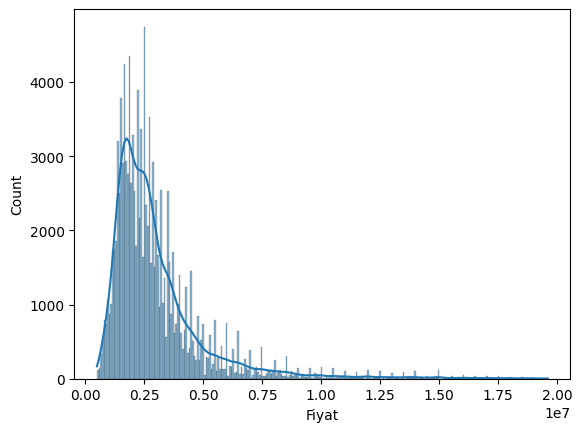

In [45]:
sns.histplot(data=df_, x="Fiyat", kde=True)

In [46]:
df_.drop(df_[df_["Fiyat"] < 1000000].index, axis=0, inplace=True)

In [127]:
df_ist = df_[df_["Sehir"] == "İstanbul"]

<Axes: xlabel='Fiyat', ylabel='Count'>

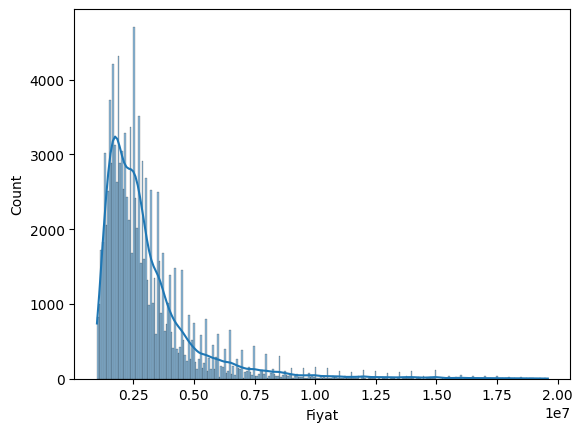

In [102]:
sns.histplot(data=df_, x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

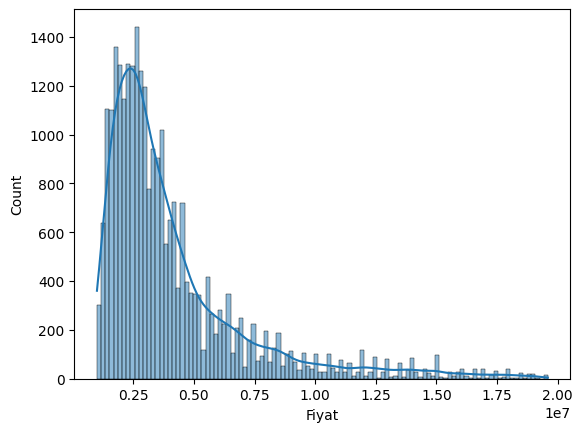

In [50]:
sns.histplot(data=df_ist, x="Fiyat", kde=True)

In [51]:
df_.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,116107.000,3102817.257,2120885.885,1000000.000,1299999.000,1820000.000,2500000.000,3550000.000,5300000.000,12500000.000,19600000.000
Oda Sayısı,116107.000,3.626,0.963,1.000,2.000,3.000,4.000,4.000,5.000,7.000,12.000
Bulunduğu Kat,116107.000,3.016,2.795,-4.000,1.000,1.000,2.000,4.000,6.000,13.000,40.000
Brüt Metrekare,116107.000,132.070,53.000,20.000,65.000,100.000,125.000,155.000,190.000,300.000,1000.000
Binanın Kat Sayısı,116107.000,5.764,3.904,1.000,3.000,4.000,5.000,7.000,11.000,21.000,99.000
Banyo Sayısı,116107.000,1.393,0.555,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,33039.000,1.550,0.610,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,39668.000,1.547,0.609,1.000,1.000,1.000,1.000,2.000,2.000,3.000,6.000


In [52]:
df_ist.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,27361.000,4139972.554,3087011.758,1000000.000,1400000.000,2200000.000,3100000.000,4800000.000,8000000.000,16390000.000,19600000.000
Oda Sayısı,27361.000,3.547,1.040,1.000,2.000,3.000,3.000,4.000,5.000,7.000,12.000
Bulunduğu Kat,27361.000,3.235,3.367,-4.000,0.000,1.000,2.000,4.000,6.000,17.000,40.000
Brüt Metrekare,27361.000,121.042,46.285,27.000,70.000,90.000,110.000,140.000,180.000,275.800,1000.000
Binanın Kat Sayısı,27361.000,6.726,5.030,1.000,3.000,4.000,5.000,7.000,12.000,30.000,99.000
Banyo Sayısı,27361.000,1.372,0.559,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,6605.000,1.319,0.539,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,9763.000,1.400,0.562,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000


In [53]:
df_ist[df_ist["Fiyat"] < 8000000].shape

(24588, 20)

In [128]:
outliers = pd.DataFrame(columns=["Ilce","Outliers"])

for i in df_ist["Ilce"].unique():
    outlier = outlier_thresholds(df_ist[df_ist["Ilce"] == i], "Fiyat",q1=0.25,q3=0.75)
    print(i, " = " ,int(outlier[1]))
    outliers = outliers.append({"Ilce": i, "Outliers": int(outlier[1])}, ignore_index=True)
outliers

Adalar  =  21231250
Arnavutköy  =  5287500
Ataşehir  =  10125000
Avcılar  =  6390625
Bağcılar  =  8077500
Bahçelievler  =  7325000
Bakırköy  =  19000000
Başakşehir  =  11942500
Bayrampaşa  =  7693750
Beşiktaş  =  23750000
Beykoz  =  13125000
Beylikdüzü  =  6850000
Beyoğlu  =  9225000
Büyükçekmece  =  9375000
Çatalca  =  4600000
Çekmeköy  =  6208250
Esenler  =  6125000
Esenyurt  =  3600000
Eyüpsultan  =  9625000
Fatih  =  6025000
Gaziosmanpaşa  =  7097500
Güngören  =  6125000
Kadıköy  =  21481250
Kağıthane  =  8500000
Kartal  =  8187500
Küçükçekmece  =  7850000
Maltepe  =  9768125
Pendik  =  7038750
Sancaktepe  =  4928125
Sarıyer  =  20600000
Silivri  =  5275000
Sultanbeyli  =  4350000
Sultangazi  =  5925000
Şile  =  8875000
Şişli  =  12575000
Tuzla  =  7900000
Ümraniye  =  8803125
Üsküdar  =  15087500
Zeytinburnu  =  9375000


,Ilce,Outliers
0,Adalar,21231250
1,Arnavutköy,5287500
2,Ataşehir,10125000
3,Avcılar,6390625
4,Bağcılar,8077500
5,Bahçelievler,7325000
6,Bakırköy,19000000
7,Başakşehir,11942500
8,Bayrampaşa,7693750
9,Beşiktaş,23750000


In [129]:
df_outliers = df_ist.groupby("Ilce")["Fiyat"].agg(["count","mean","max"]).sort_values(by="Ilce").reset_index()
df_outliers = df_outliers.merge(outliers, on='Ilce', how='left')
df_outliers

,Ilce,count,mean,max,Outliers
0,Adalar,14,8645357.143,15300000,21231250
1,Arnavutköy,429,2953135.268,18200000,5287500
2,Ataşehir,462,5036818.182,18500000,10125000
3,Avcılar,828,3119914.248,16000000,6390625
4,Bahçelievler,1445,3448096.886,19000000,7325000
5,Bakırköy,528,7436007.574,19000000,19000000
6,Bayrampaşa,348,3945324.713,15850000,7693750
7,Bağcılar,614,3695949.508,17000000,8077500
8,Başakşehir,926,4905096.002,19000000,11942500
9,Beykoz,77,7123961.039,17800000,13125000


<Axes: xlabel='Fiyat', ylabel='Count'>

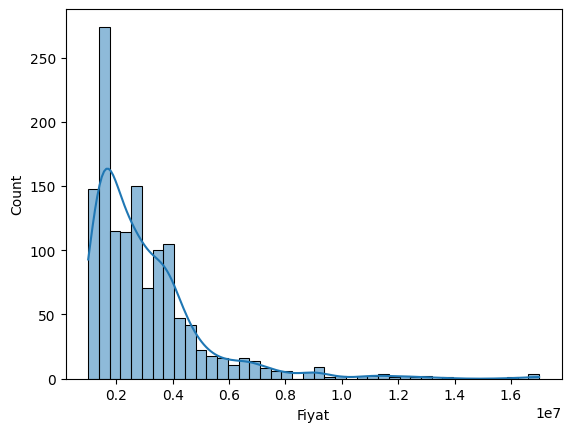

In [121]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Beylikdüzü"], x="Fiyat", kde=True)

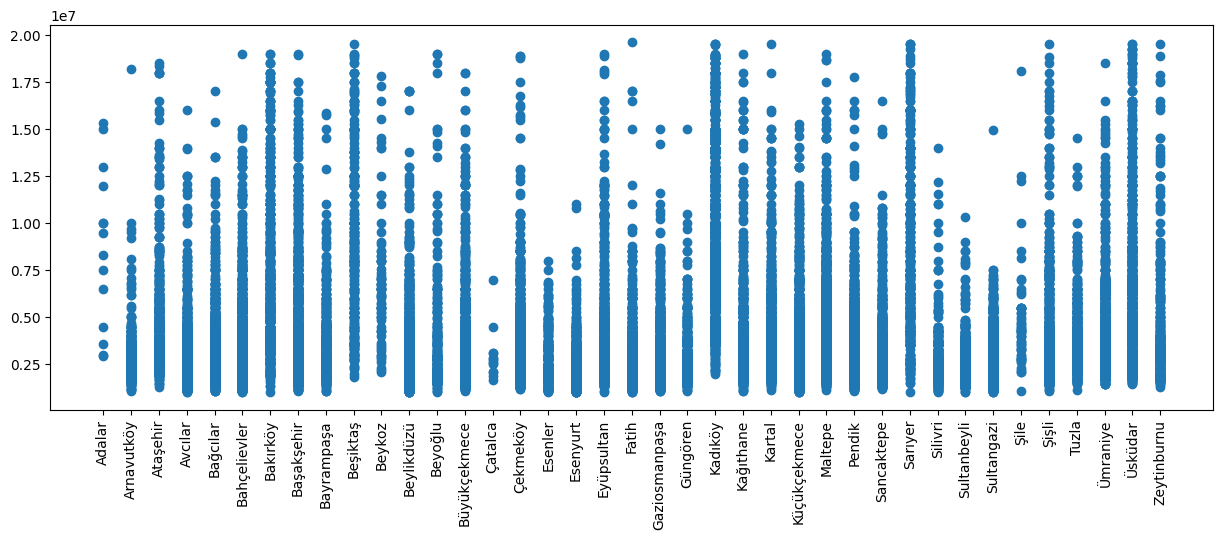

In [122]:
plt.figure(figsize=(15,5))
plt.scatter(df_ist["Ilce"],df_ist["Fiyat"])
plt.xticks(rotation=90)
plt.show()

In [130]:
for i in df_ist["Ilce"].unique():
    outlier = outlier_thresholds(df_ist[df_ist["Ilce"] == i], "Fiyat",q1=0.25,q3=0.75)
    df_ist.drop(df_ist[(df_ist["Ilce"]==i) & (df_ist["Fiyat"] >= int(outlier[1])) ].index, axis=0, inplace=True)

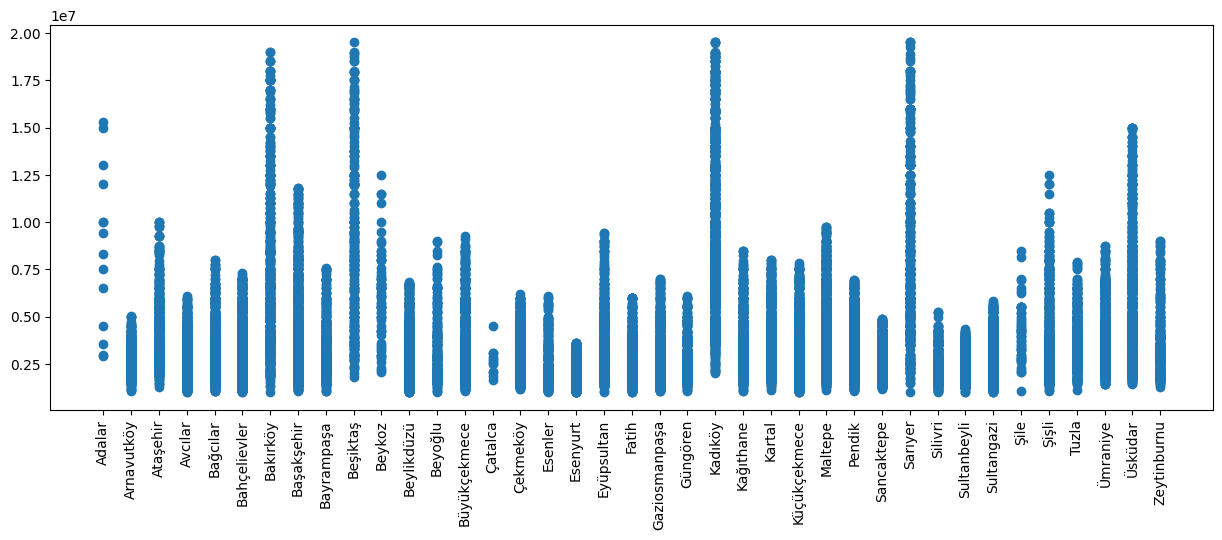

In [124]:
plt.figure(figsize=(15,5))
plt.scatter(df_ist["Ilce"],df_ist["Fiyat"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Fiyat', ylabel='Count'>

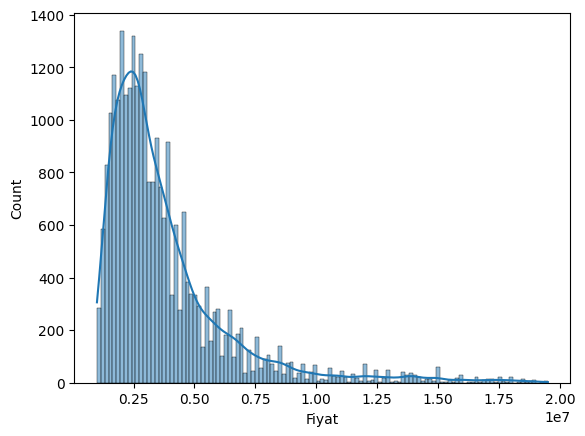

In [145]:
sns.histplot(data=df_ist, x="Fiyat", kde=True)

In [131]:
df_after_outliers = df_ist.groupby("Ilce")["Fiyat"].agg(["count","mean","max","min"]).reset_index()
df_after_outliers = pd.concat([df_outliers, df_after_outliers], axis=1)
df_after_outliers

,Ilce,count,mean,max,Outliers,Ilce,count,mean,max,min
0,Adalar,14,8645357.143,15300000,21231250,Adalar,14,8645357.143,15300000,2950000
1,Arnavutköy,429,2953135.268,18200000,5287500,Arnavutköy,412,2742342.306,5050000,1100000
2,Ataşehir,462,5036818.182,18500000,10125000,Ataşehir,426,4307464.789,10000000,1300000
3,Avcılar,828,3119914.248,16000000,6390625,Avcılar,775,2734393.546,6104000,1000000
4,Bahçelievler,1445,3448096.886,19000000,7325000,Bahçelievler,1341,2957143.922,7300000,1000000
5,Bakırköy,528,7436007.574,19000000,19000000,Bakırköy,526,7392038.021,18500000,1000000
6,Bayrampaşa,348,3945324.713,15850000,7693750,Bayrampaşa,329,3551881.459,7600000,1050000
7,Bağcılar,614,3695949.508,17000000,8077500,Bağcılar,582,3322711.340,8000000,1050000
8,Başakşehir,926,4905096.002,19000000,11942500,Başakşehir,875,4370764.455,11800000,1050000
9,Beykoz,77,7123961.039,17800000,13125000,Beykoz,69,6153550.725,12500000,2100000


<Axes: xlabel='Fiyat', ylabel='Count'>

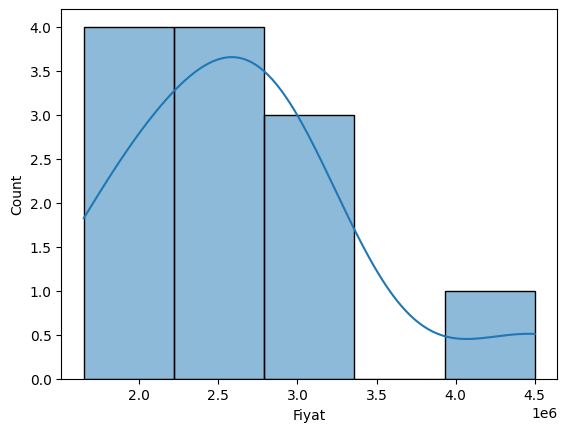

In [134]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Çatalca"], x="Fiyat", kde=True)

In [135]:
df_ist[(df_ist["Ilce"] =="Çatalca") & (df_ist["Fiyat"] > 4000000)]

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
18781,4500000,6,5,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,NaN,Hayır,160,0 (Yeni),5,Boş,Yatırıma Uygun,2,3.000,NaN,İstanbul,Çatalca,Kaleiçi Mahallesi


In [136]:
df_ist.drop(df_ist[(df_ist["Ilce"] =="Çatalca") & (df_ist["Fiyat"] > 4000000)].index, axis=0, inplace=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

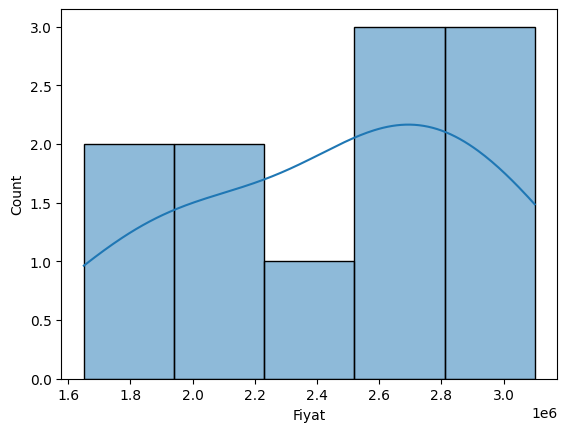

In [137]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Çatalca"], x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

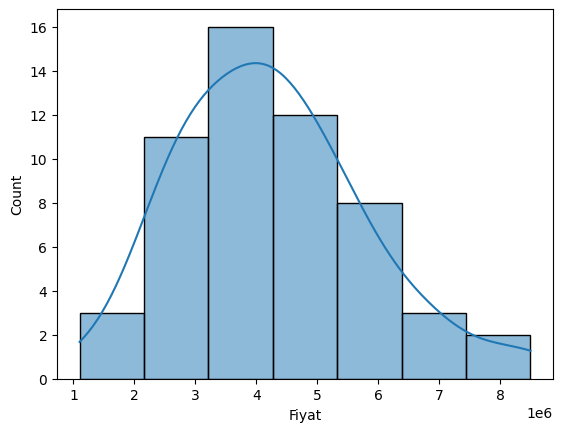

In [138]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Şile"], x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

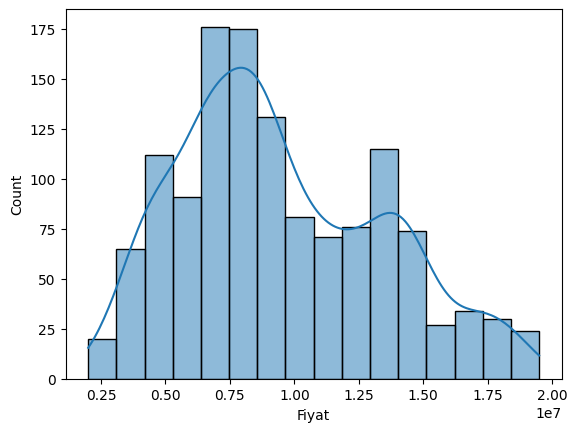

In [144]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Kadıköy"], x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

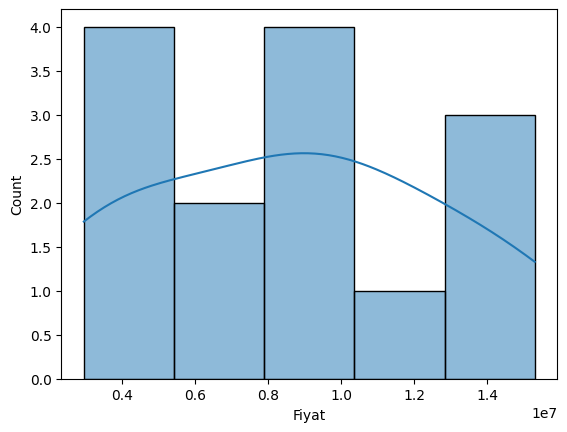

In [140]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Adalar"], x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

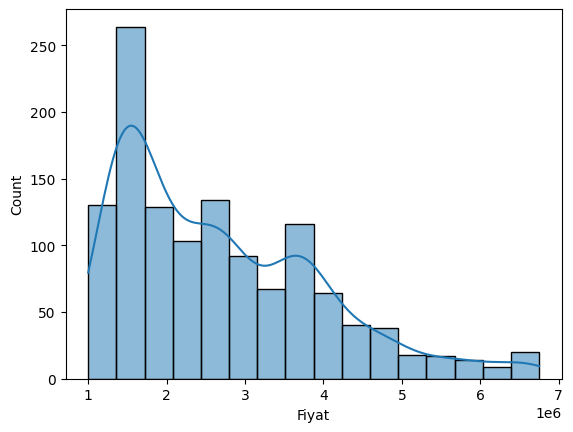

In [141]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Beylikdüzü"], x="Fiyat", kde=True)

<Axes: xlabel='Fiyat', ylabel='Count'>

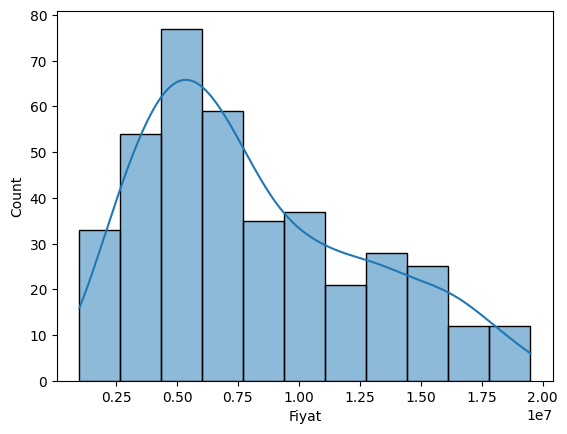

In [142]:
sns.histplot(data=df_ist[df_ist["Ilce"] == "Sarıyer"], x="Fiyat", kde=True)

In [153]:
df_ist[df_ist["Ilce"]=="Kadıköy"].describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,1302.000,9480479.279,3967326.328,2000000.000,3901750.000,6512500.000,8750000.000,12500000.000,14950000.000,18750000.000,19500000.000
Oda Sayısı,1302.000,3.773,0.780,1.000,3.000,3.000,4.000,4.000,5.000,6.000,7.000
Bulunduğu Kat,1302.000,5.049,3.863,-1.000,1.000,2.000,4.000,7.000,10.000,16.990,24.000
Brüt Metrekare,1302.000,127.730,35.091,45.000,75.000,105.000,125.000,143.250,175.000,240.000,300.000
Binanın Kat Sayısı,1302.000,9.751,3.998,3.000,4.000,7.000,9.000,12.000,14.000,24.000,30.000
Banyo Sayısı,1302.000,1.627,0.547,1.000,1.000,1.000,2.000,2.000,2.000,3.000,4.000
Balkon Sayısı,160.000,1.337,0.571,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,282.000,1.635,0.545,1.000,1.000,1.000,2.000,2.000,2.000,3.000,3.000


In [132]:
df_ist.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,25909.000,3793196.155,2653345.867,1000000.000,1395000.000,2150000.000,3000000.000,4500000.000,6750000.000,15000000.000,19500000.000
Oda Sayısı,25909.000,3.487,0.988,1.000,2.000,3.000,3.000,4.000,5.000,7.000,10.000
Bulunduğu Kat,25909.000,3.120,3.224,-4.000,0.000,1.000,2.000,4.000,6.000,16.000,40.000
Brüt Metrekare,25909.000,117.138,41.122,27.000,70.000,90.000,110.000,135.000,168.200,250.000,1000.000
Binanın Kat Sayısı,25909.000,6.580,4.842,1.000,3.000,4.000,5.000,7.000,12.000,30.000,99.000
Banyo Sayısı,25909.000,1.332,0.526,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,6275.000,1.301,0.525,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,9364.000,1.374,0.539,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000


In [133]:
df_ist[df_ist["Fiyat"] > 15000000].groupby("Ilce")["Fiyat"].agg(["count","mean","max","min"])

,count,mean,max,min
Ilce,,,,
Adalar,1,15300000.000,15300000,15300000
Bakırköy,39,16965384.615,18500000,15500000
Beşiktaş,32,17203125.000,19500000,15250000
Kadıköy,115,17259348.017,19500000,15200000
Sarıyer,41,17005414.634,19500000,15247000


In [146]:
df_ist[df_ist["Fiyat"] > 9000000].groupby("Ilce")["Fiyat"].agg(["count","mean","max","min"])

,count,mean,max,min
Ilce,,,,
Adalar,7,12105714.286,15300000,9450000
Ataşehir,10,9635000.000,10000000,9250000
Bakırköy,152,13230559.211,18500000,9100000
Başakşehir,57,10446666.667,11800000,9100000
Beykoz,6,11000000.000,12500000,9500000
Beşiktaş,110,13427481.682,19500000,9100000
Büyükçekmece,2,9175000.000,9250000,9100000
Eyüpsultan,3,9381666.667,9445000,9300000
Kadıköy,587,13111345.864,19500000,9100000


In [148]:
df_ist.to_csv("istanbul.csv")

In [150]:
for ilce_adi in df_ist["Ilce"].unique():
    name = ilce_adi + ".csv"
    df_ist[df_ist["Ilce"] == ilce_adi].to_csv("ilce_csv/"+name)

In [151]:
df_ist.head()

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Sehir,Ilce,Mahalle
10407,2950000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,4,Boş,NaN,1,NaN,NaN,İstanbul,Adalar,Heybeliada Mahallesi
10408,9450000,6,2,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,170,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,İstanbul,Adalar,Maden Mahallesi
10409,3550000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,3,Boş,NaN,1,NaN,NaN,İstanbul,Adalar,Heybeliada Mahallesi
10410,15300000,6,6,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,250,21 Ve Üzeri,6,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,İstanbul,Adalar,Burgazada Mahallesi
10411,13000000,5,2,Kat Kaloriferi,Krediye Uygun,İkinci El,NaN,NaN,Hayır,230,21 Ve Üzeri,3,Boş,NaN,2,NaN,NaN,İstanbul,Adalar,Heybeliada Mahallesi
